In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from xgboost import XGBRFRegressor
from itertools import combinations
from xgboost import XGBClassifier
import re
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model
import warnings
warnings.filterwarnings("ignore")

In [222]:
path = "D:/Users/Asus/Documents/PYTHON PARA APIS/Proyecto Final 1 Corte/"

In [223]:
%%time
dataset = pd.read_csv(path  + 'train.csv')
prueba = pd.read_csv(path + "test.csv")

CPU times: total: 688 ms
Wall time: 1.51 s


In [224]:
dataset

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [225]:
dataset.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [226]:
ct = [ 'Marital status', 'Application mode','Application order','Course','Daytime/evening attendance', 'Nacionality',
      "Mother's occupation","Father's occupation", 'Displaced', 'Educational special needs','Debtor','Tuition fees up to date', 'Gender',
      'Scholarship holder','International']
for k in ct:
  dataset[k] = dataset[k].astype("O")
  prueba[k] = prueba[k].astype("O")

In [227]:
dataset.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout


In [228]:
prueba.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.0,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.5,0,11.1,0.6,2.02


In [229]:
dataset.shape

(76518, 38)

## Datos Faltantes Dataset


In [230]:
ft = pd.DataFrame(dataset.isnull().sum()).reset_index()
ft.columns = ["Variable","Faltantes"]
ft["% Faltantes"] = ft["Faltantes"] * 100 / dataset.shape[0]
ft.loc[ft["% Faltantes"]>0]

,Variable,Faltantes,% Faltantes


## Datos Faltantes Prueba

In [231]:
ft2 = pd.DataFrame(prueba.isnull().sum()).reset_index()
ft2.columns = ["Variable","Faltantes"]
ft2["% Faltantes"] = ft2["Faltantes"] * 100 / prueba.shape[0]
ft2.loc[ft2["% Faltantes"]>0]

,Variable,Faltantes,% Faltantes


In [232]:
formato = pd.DataFrame({'Variable': list(dataset.columns), 'Formato': dataset.dtypes })
ft = pd.merge(ft,formato,on=["Variable"],how="left")
ft.head()

,Variable,Faltantes,% Faltantes,Formato
0,id,0,0.0,int64
1,Marital status,0,0.0,object
2,Application mode,0,0.0,object
3,Application order,0,0.0,object
4,Course,0,0.0,object


## Analisis Descriptivo


In [235]:
cuantitativas = ['Previous qualification','Previous qualification (grade)', 'Admission grade','Age at enrollment','Unemployment rate','Inflation rate','GDP',
                 "Mother's qualification","Father's qualification",'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']

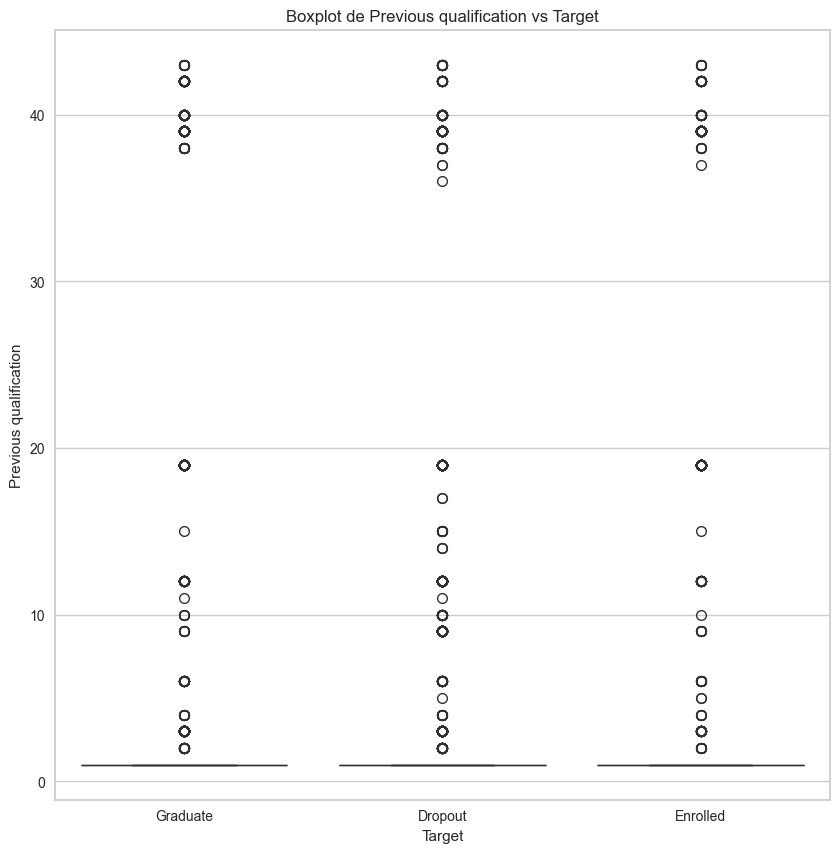

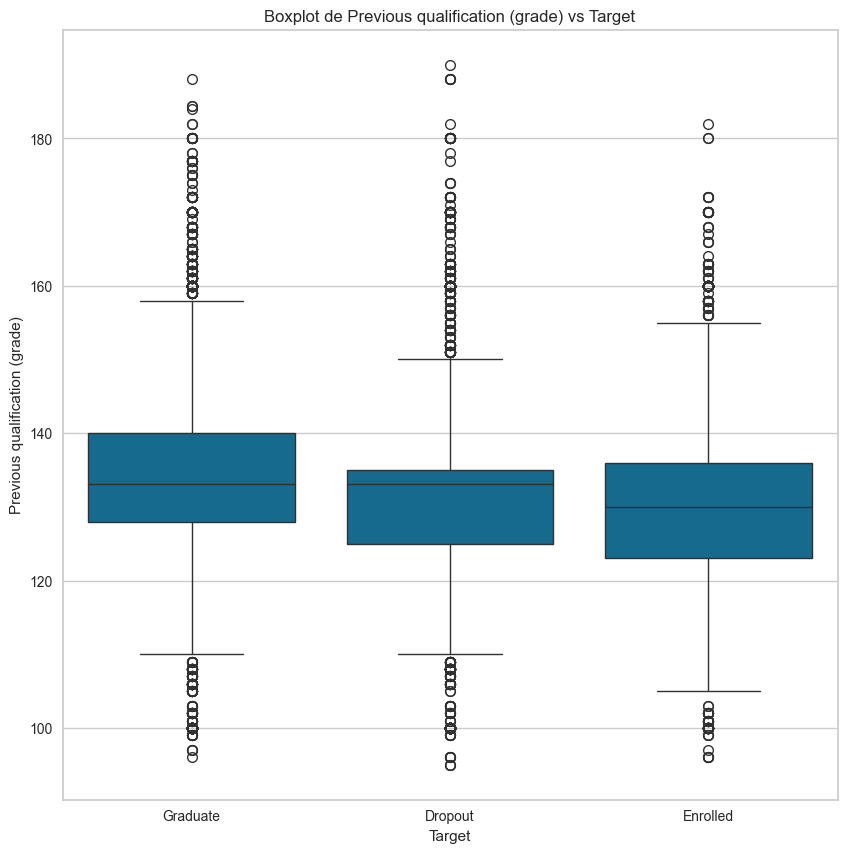

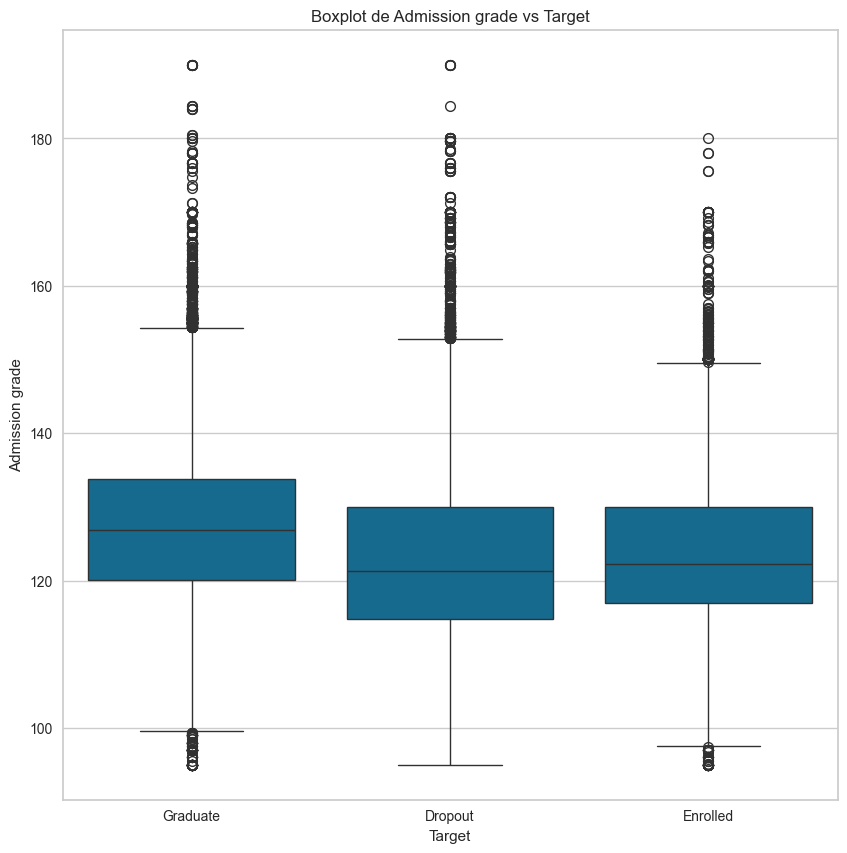

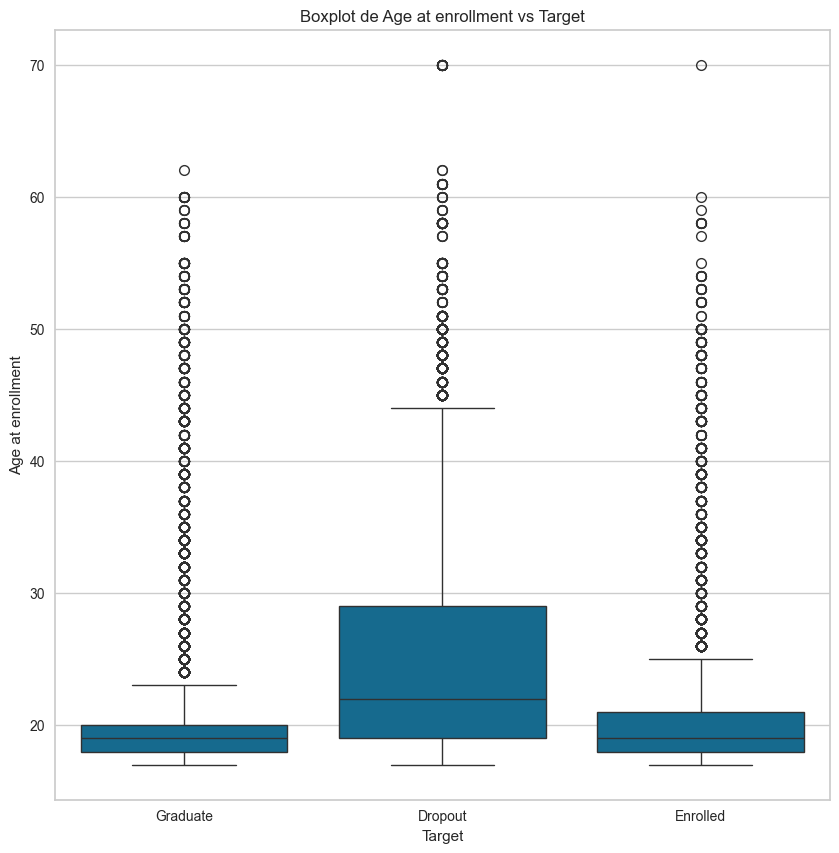

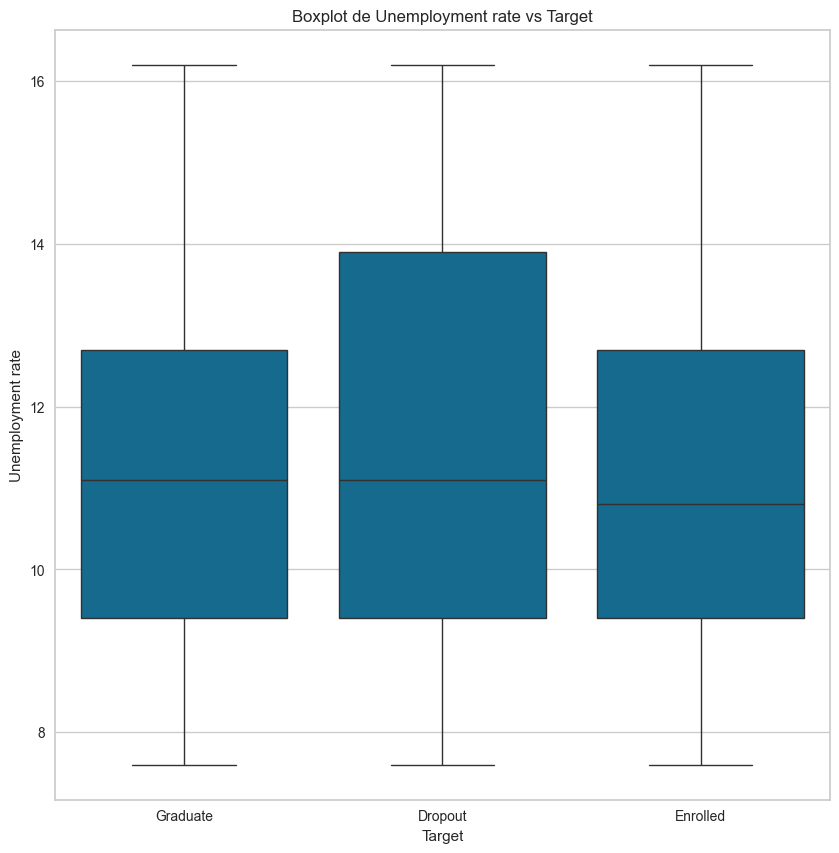

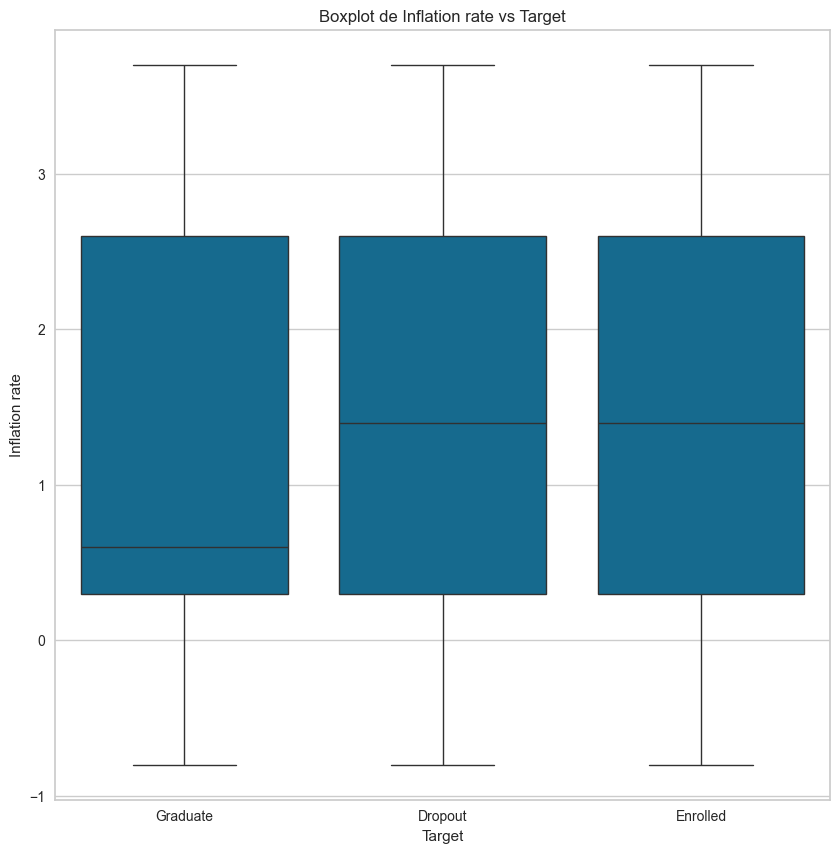

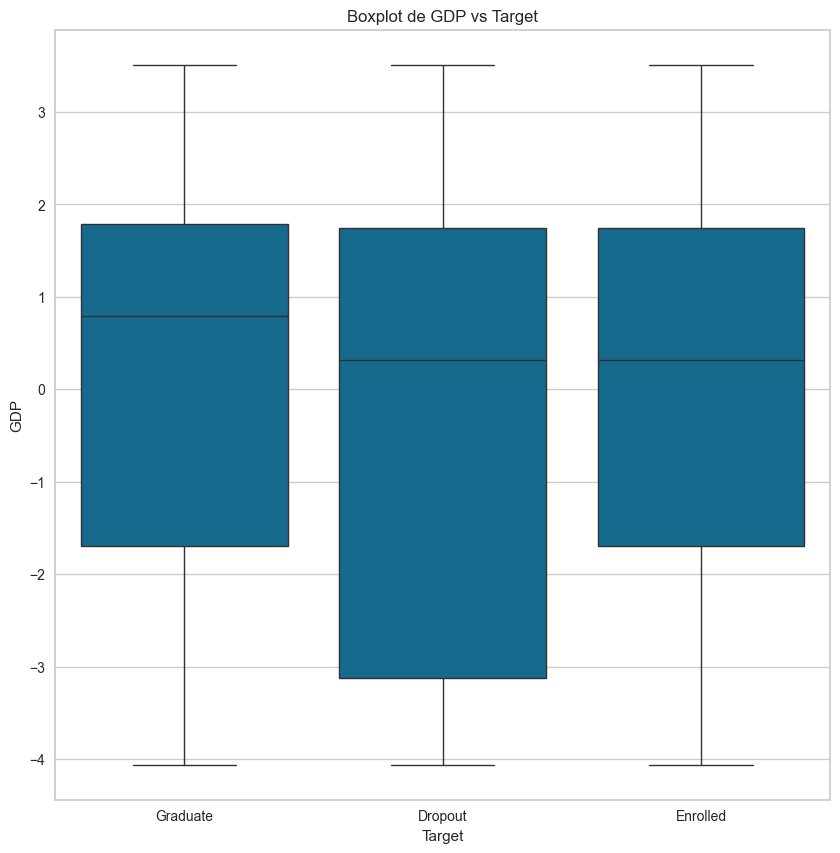

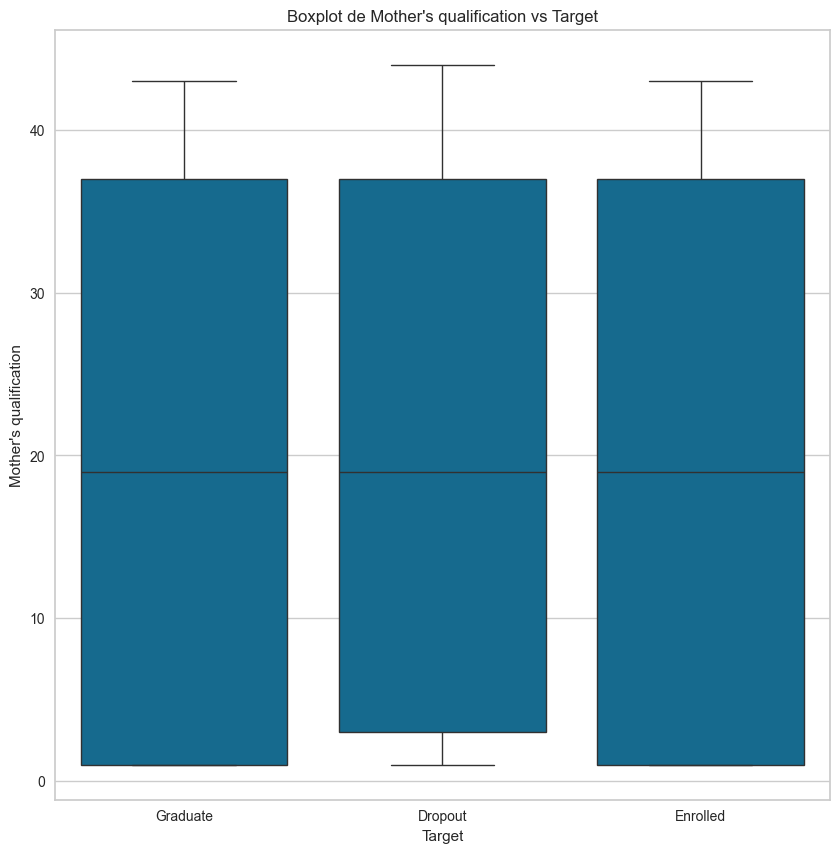

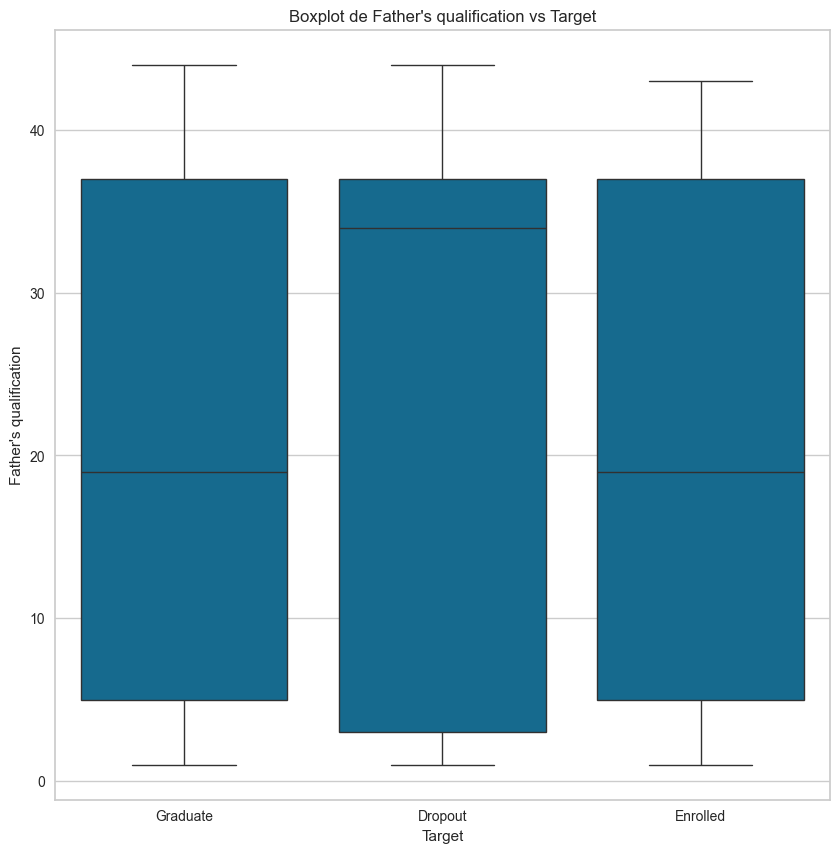

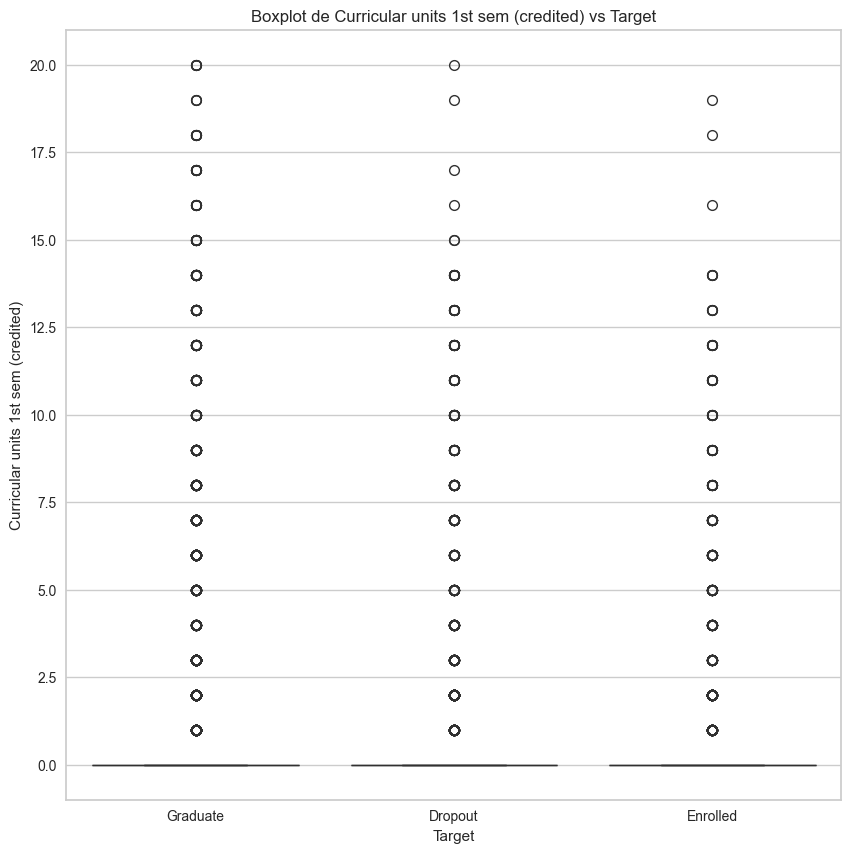

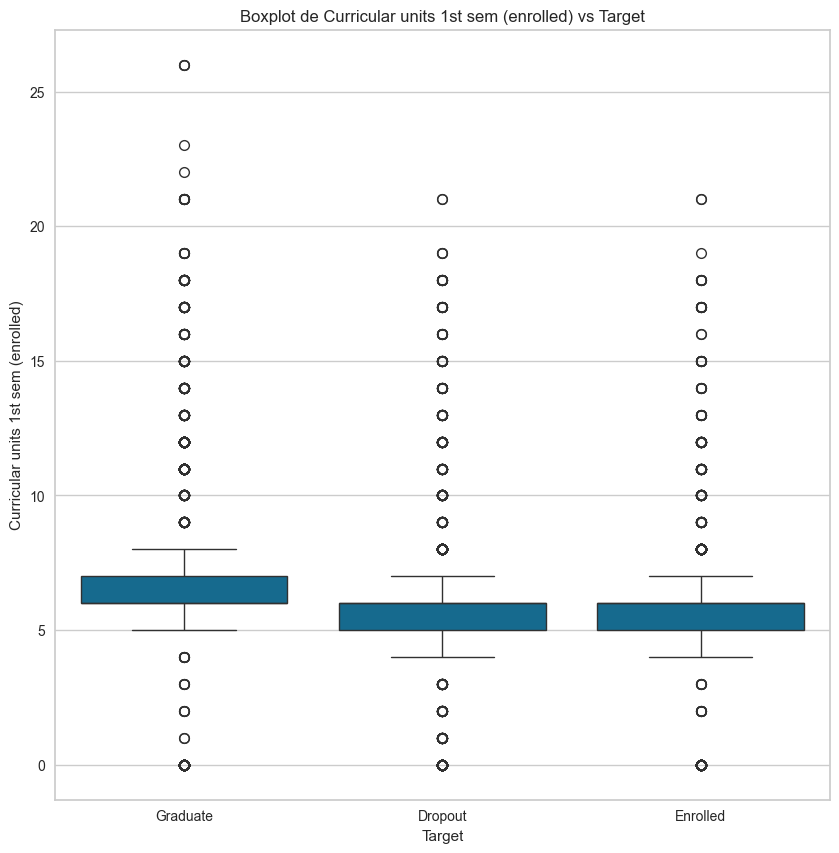

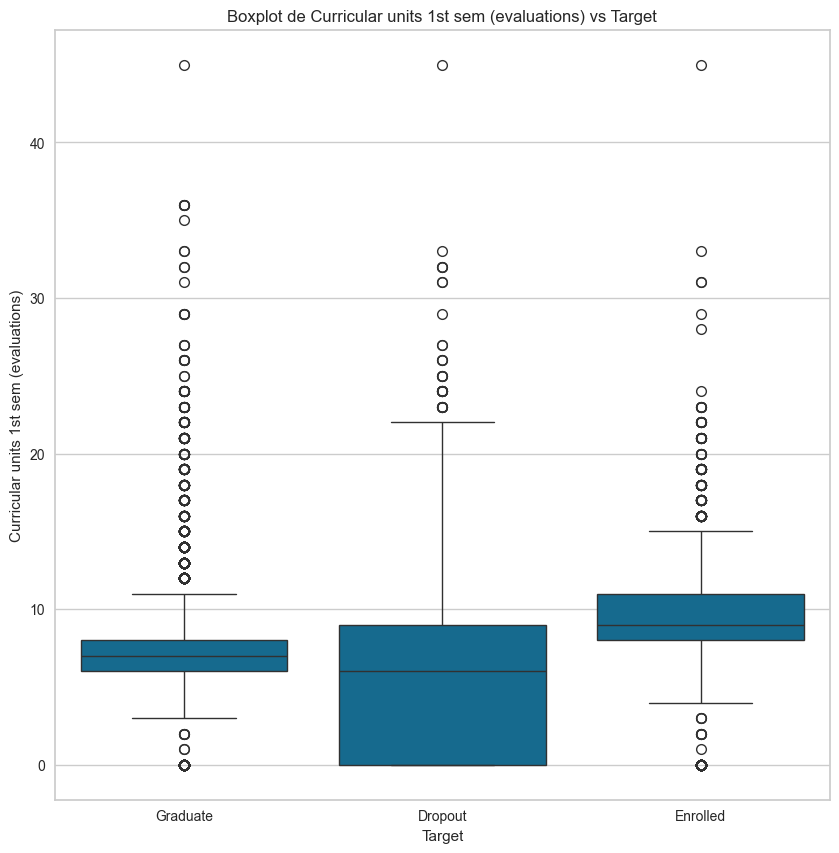

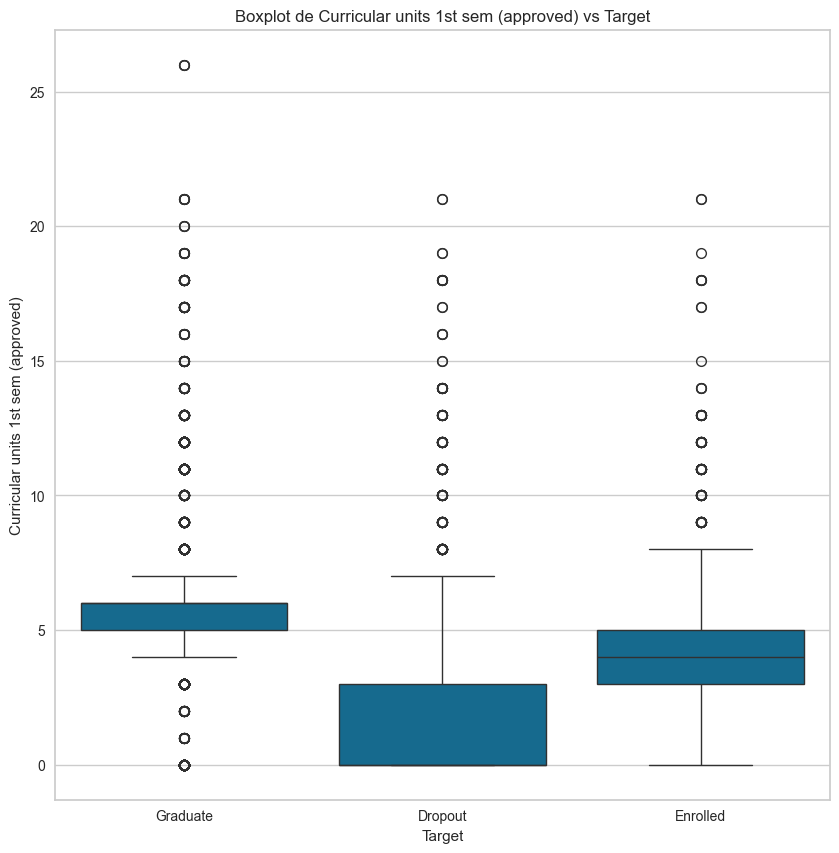

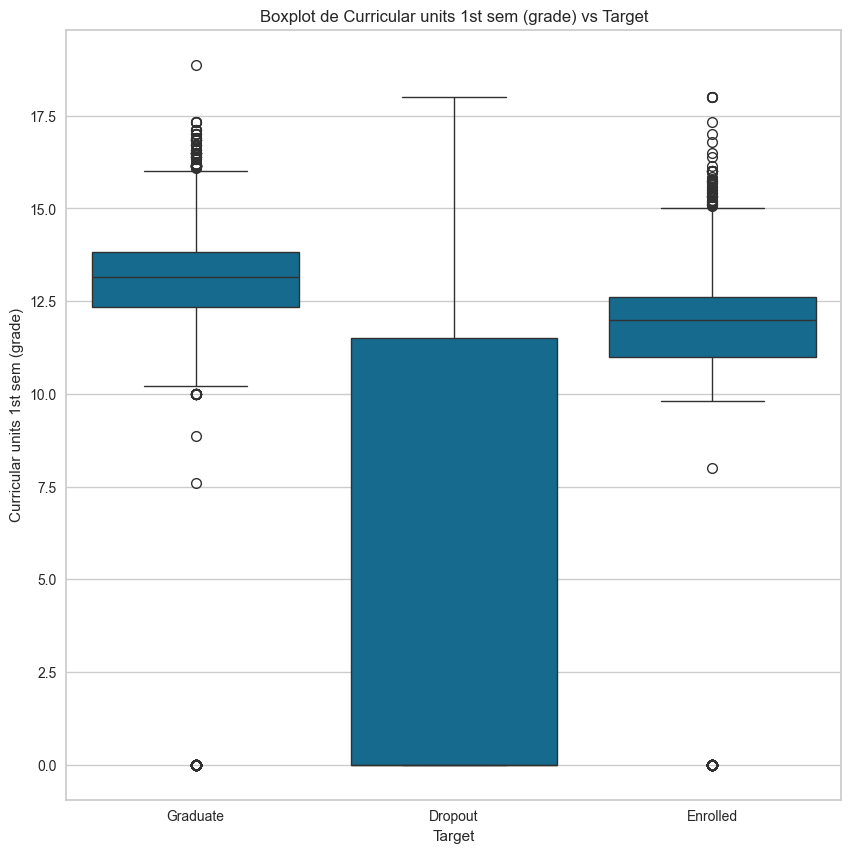

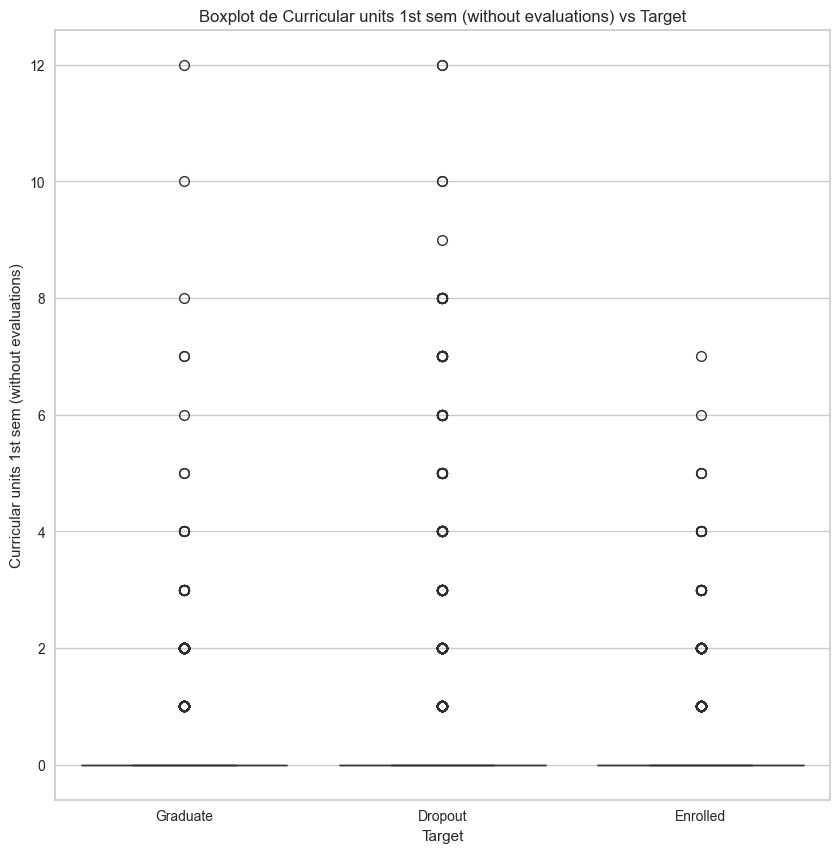

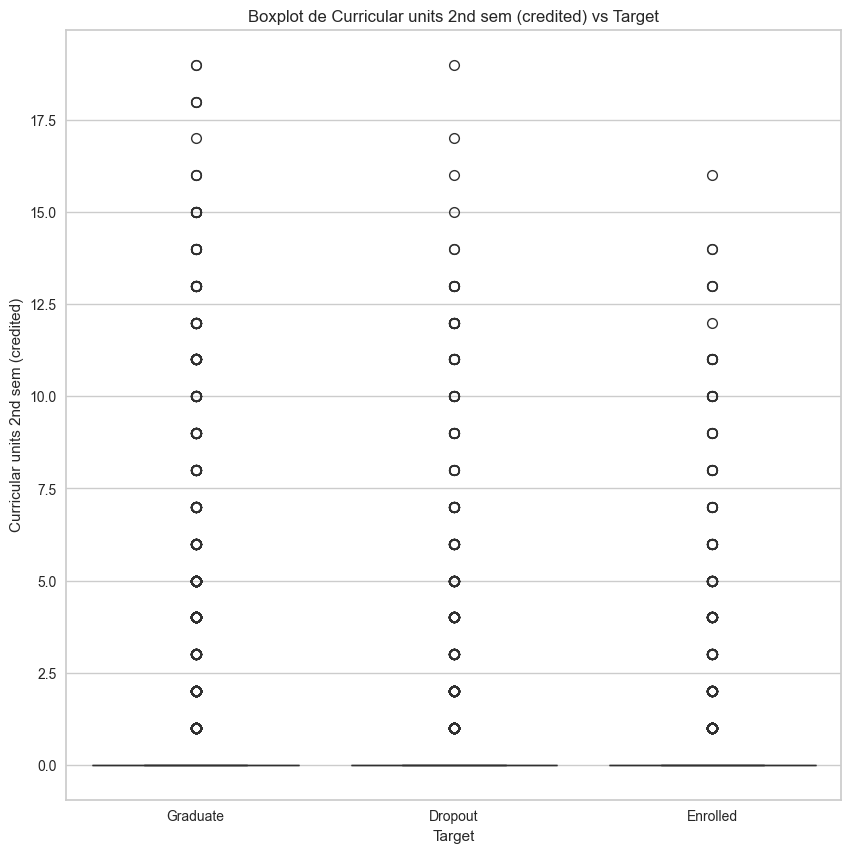

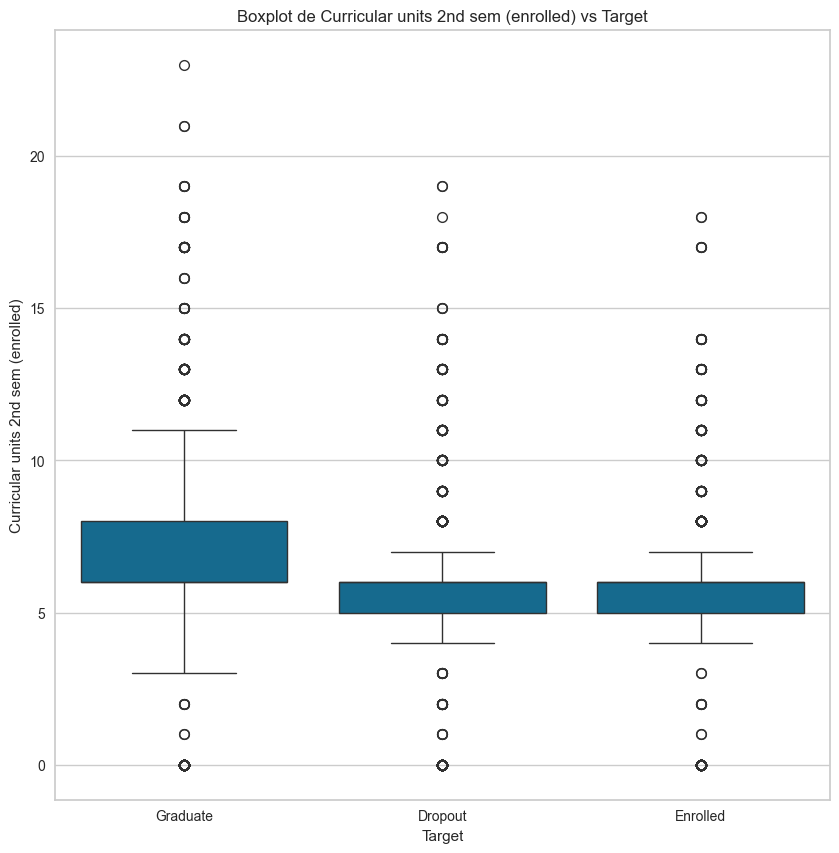

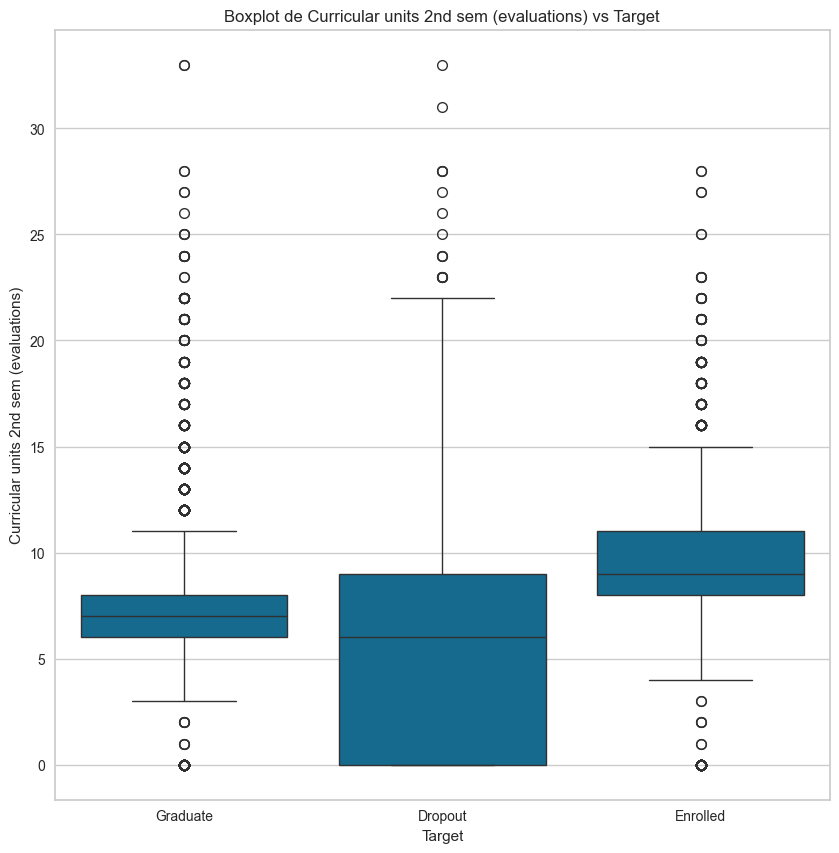

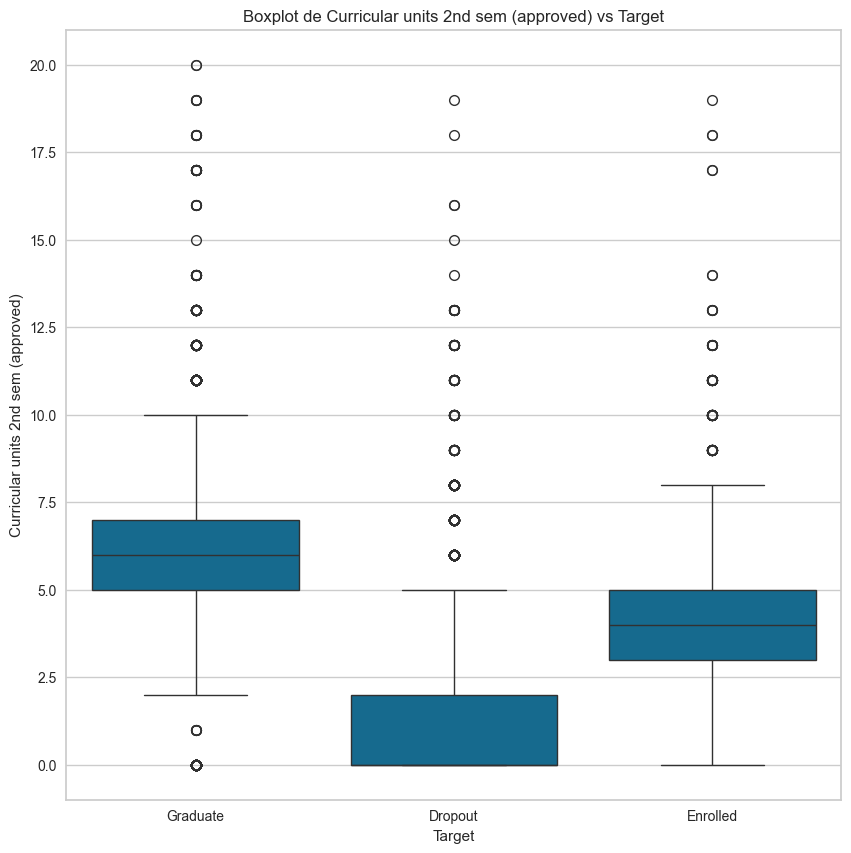

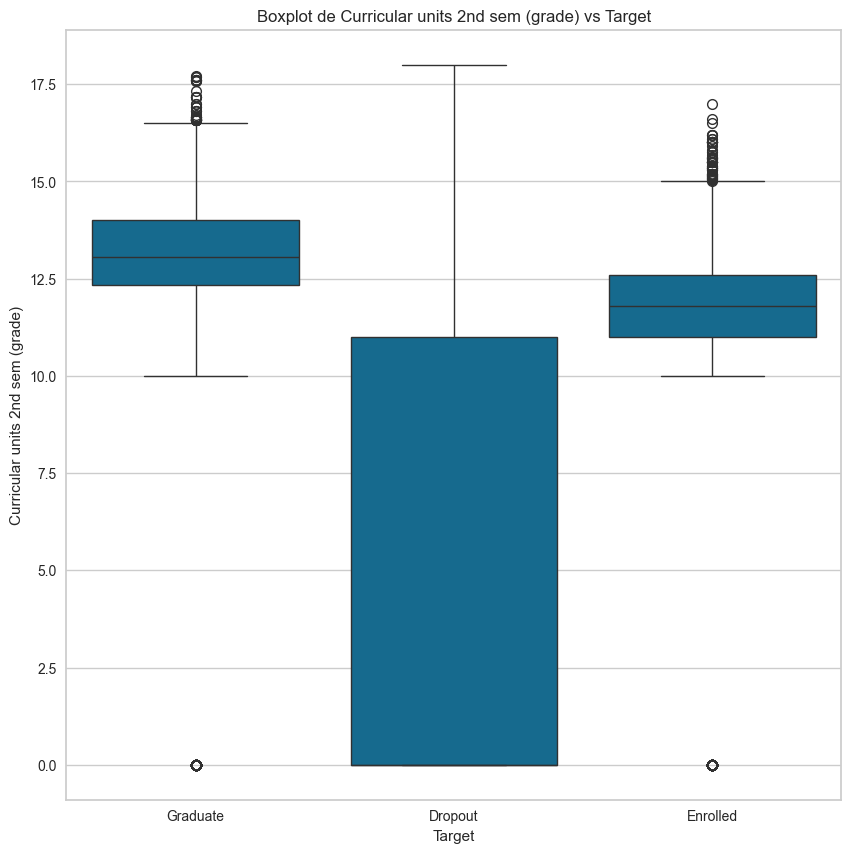

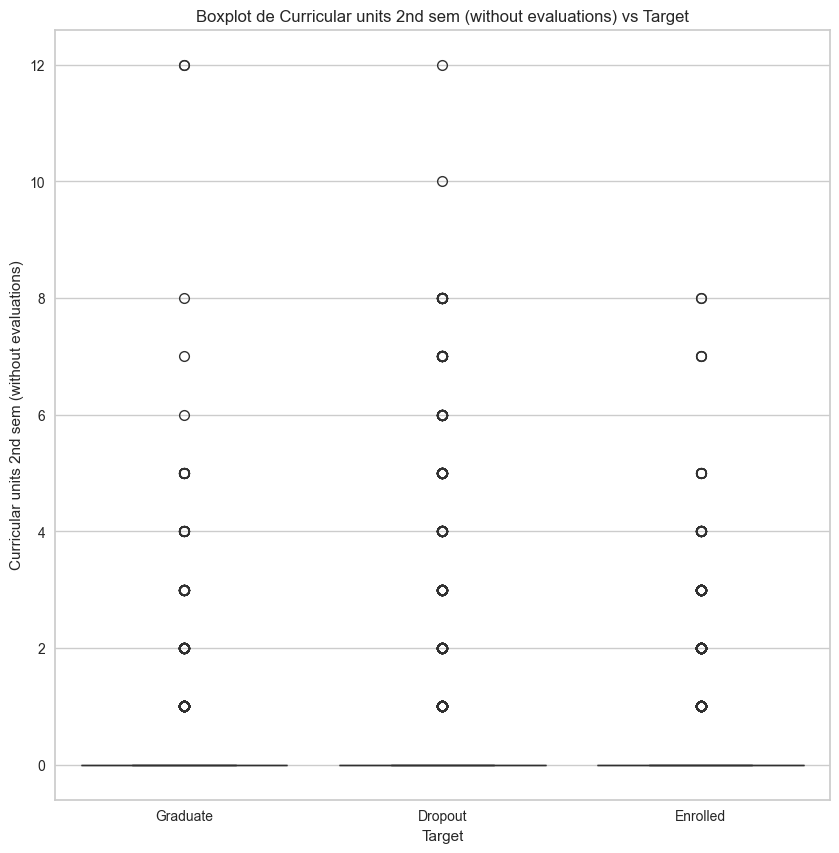

In [236]:
for k in cuantitativas:
    plt.figure(figsize=(10,10))
    sns.boxplot(x="Target",y=k,data=dataset)
    plt.title("Boxplot de "+k+" vs Target")

#### Gráfico boxplot distribución de la variable "Previous qualification" (calificación previa) en función del "Target" (resultado: Graduate, Dropout, Enrolled).

#### - Graduate, Dropout, Enrolled tienen una distribución similar de calificaciones previas.
#### - Existen valores atipicos en las tres categorías (valores por encima de 40), que son casos extraordinarios con calificaciones previas muy altas.
#### - La mayor parte de las calificaciones previas se concentra cerca de los valores bajos (cerca de 0), lo que indica una mediana baja en todas las categorías.

In [237]:
def asociacion(data): # prueba chi cuadrado
    categoricas=dataset.columns[dataset.dtypes=='O']
    V1=np.array(categoricas); V2=np.array(categoricas)
    grilla=np.meshgrid(V1,V2)
    grilla=pd.DataFrame({'Var1':grilla[0].ravel(),'Var2':grilla[1].ravel()})
    p_value=[stats.chi2_contingency(pd.DataFrame(pd.crosstab(data[grilla.iloc[x]['Var1']],data[grilla.iloc[x]['Var2']])))[1] for x in range(grilla.shape[0])]

    grilla['p_value']=p_value
    grilla2=grilla.pivot(index='Var1',columns='Var2',values='p_value')
    plt.figure(figsize=(10,8))
    gr=sns.heatmap(grilla2,linewidths=0.01,annot=True,fmt='.2f',cmap='summer')
    gr.set_title('Grilla de p valores en prueba chi cuadrado para verificar asociación entre variables')
    plt.xlabel(""); plt.ylabel(""); plt.yticks(rotation=0); plt.xticks(rotation=90)
    plt.show()
    return grilla,grilla2

In [238]:
categoricas=dataset.columns[dataset.dtypes=='O']
categoricas

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Nacionality', 'Mother's occupation',
       'Father's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'International', 'Target'],
      dtype='object')

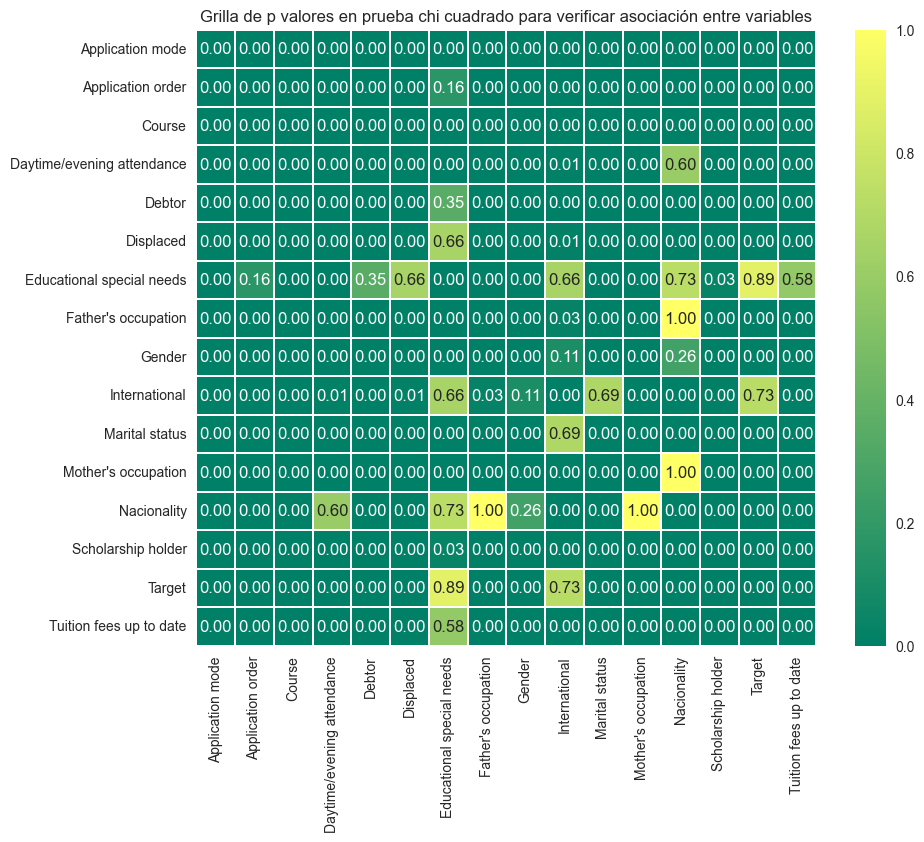

In [239]:
grilla_asociacion, grilla_asociacion2 = asociacion(dataset.drop(["id"],axis=1)) # mapa de calor (quitó cedula) (variable riesgo ( variables respuesta))
# h0 = variables son independientes
# h1 = variables son dependientes
# rechazar nula = p value < significancia 1%, 5%, 10%)

#### Los valores cercanos a 0 como las variables "Application mode", "Application order", "Daytime/evening attendance", "Debtor", y "Target" tienen una fuerte relacion con muchas otras variables del conjunto de datos.
#### Los valores cercanos a 1 como las variables "Father's occupation", "Nacionality", e "International" no están asociadas significativamente con otras variables en muchas de las comparaciones, ya que sus valores p son altos.

#### Application mode y Course tienen un valor p de 0.00, lo que sugiere que existe una fuerte relación entre estas variables.
#### La variable Father's occupation con "Application order" tiene un valor p de 1.00, lo cual indica que no hay una relación significativa entre estas variables.

#### Target y Father's occupation tienen un valor p de 0.73, de este modo, se puede observar que no hay una relación fuerte entre el objetivo final (probablemente el rendimiento del estudiante o algún resultado clave) y la ocupación del padre.

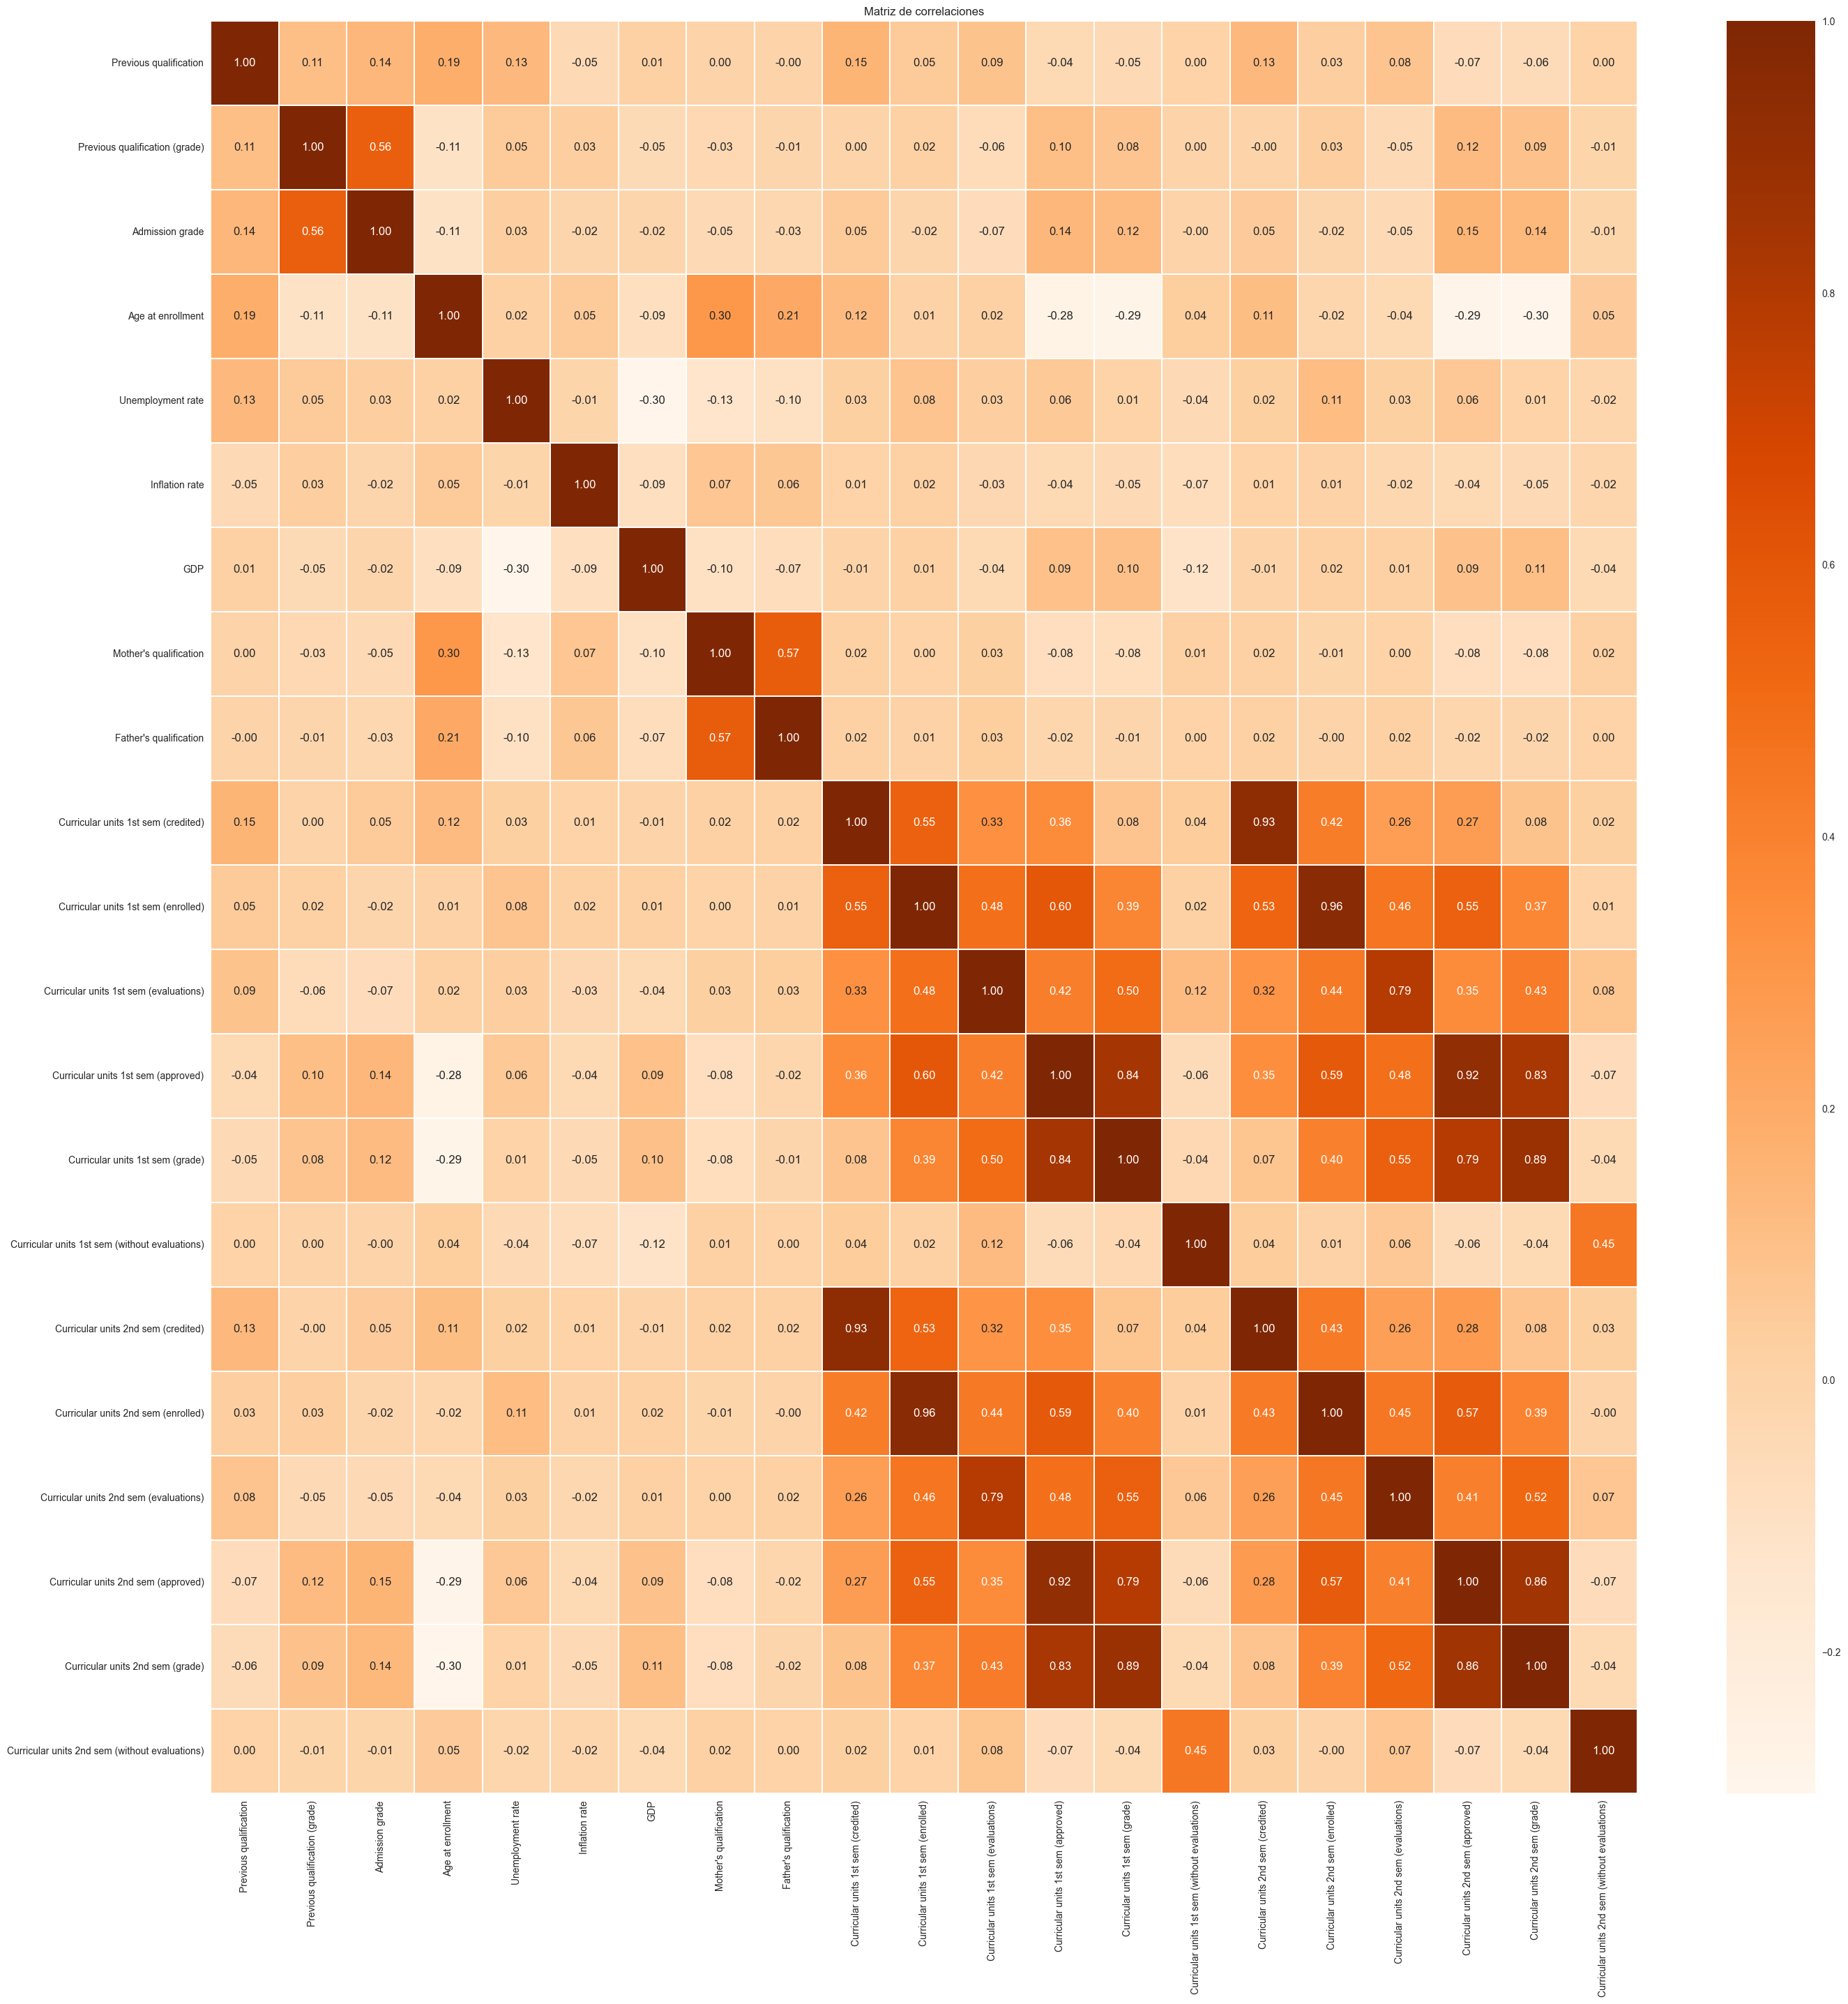

In [240]:
co = dataset.get(cuantitativas).copy()
cor_ = co.corr()
plt.figure(figsize=(33,33))
sns.heatmap(cor_, linewidths=0.01, annot=True, fmt = ".2f", cmap="Oranges")
plt.title("Matriz de correlaciones")
plt.show()

In [241]:
ft

,Variable,Faltantes,% Faltantes,Formato
0,id,0,0.0,int64
1,Marital status,0,0.0,object
2,Application mode,0,0.0,object
3,Application order,0,0.0,object
4,Course,0,0.0,object
5,Daytime/evening attendance,0,0.0,object
6,Previous qualification,0,0.0,int64
7,Previous qualification (grade),0,0.0,float64
8,Nacionality,0,0.0,object
9,Mother's qualification,0,0.0,int64


## Preparación de Datos

In [242]:
numericas = dataset.get(cuantitativas)
numericas.head()

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,Mother's qualification,Father's qualification,Curricular units 1st sem (credited),...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,1,126.0,122.6,18,11.1,0.6,2.02,1,19,0,...,6,6,14.500000,0,0,6,7,6,12.428571,0
1,1,125.0,119.8,18,11.1,0.6,2.02,19,19,0,...,8,4,11.600000,0,0,6,9,0,0.000000,0
2,1,137.0,144.7,18,16.2,0.3,-0.92,3,19,0,...,0,0,0.000000,0,0,6,0,0,0.000000,0
3,1,131.0,126.1,18,11.1,0.6,2.02,19,3,0,...,9,7,12.591250,0,0,8,11,7,12.820000,0
4,1,132.0,120.1,18,7.6,2.6,0.32,19,37,0,...,12,6,12.933333,0,0,7,12,6,12.933333,0


In [243]:
dataset.get(categoricas).head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Nacionality,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1,1,1,9238,1,1,5,5,0,0,0,1,0,1,0,Graduate
1,1,17,1,9238,1,1,9,9,1,0,0,1,0,0,0,Dropout
2,1,17,2,9254,1,1,2,3,0,0,0,1,1,0,0,Dropout
3,1,1,3,9500,1,1,3,2,1,0,0,1,0,1,0,Enrolled
4,1,1,2,9500,1,1,4,9,1,0,0,1,0,0,0,Graduate


## Entrenamiento del modelo Train - Test

## Ingeniería de variables

## variables al cuadrado


In [244]:
def prueba_kr(x):
  if x<=0.10:
    return 1
  else:
    return 0

def criterion_(dataset,columns):
  for k in columns:
    dataset[k] = dataset[k].map(prueba_kr)
  df["criterio"] = np.sum(df.get(columns),axis=1)
  df["criterio"] = df.apply(lambda row: 1 if row["criterio"]==3 else 0,axis = 1)
  return dataset

In [245]:
dataset["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [246]:
base_cuadrado = dataset.get(cuantitativas).copy() # traer cuantitativas y agregar variable y = (tiene o no riesgo)
base_cuadrado["Target"] = dataset["Target"].copy()

var_names2, pvalue1 = [], [] # prueba de kruskal

for k in cuantitativas:
    base_cuadrado[k+"_2"] = base_cuadrado[k] ** 2 # _2 = al cuadrado

    # Prueba de Kruskal sin logaritmo
    mue1 = base_cuadrado.loc[base_cuadrado["Target"]=="Graduate",k+"_2"].to_numpy()
    mue2 = base_cuadrado.loc[base_cuadrado["Target"]=="Dropout",k+"_2"].to_numpy()
    mue3 = base_cuadrado.loc[base_cuadrado["Target"]=="Enrolled",k+"_2"].to_numpy()

    p1 = stats.kruskal(mue1,mue2,mue3)[1] # en el 1 esta el p.valor

    # Guardar p values y variables
    var_names2.append(k+"_2")
    pvalue1.append(np.round(p1,2))

In [247]:
pcuadrado1 = pd.DataFrame({'Variable2':var_names2,'p value':pvalue1})
pcuadrado1["criterio"] = pcuadrado1.apply(lambda row: 1 if row["p value"]<=0.10 else 0,axis = 1)
pcuadrado1.head(5)
# h0 : mi_0 = mu_1
# h1 : mu_0 =/ m_1

,Variable2,p value,criterio
0,Previous qualification_2,0.0,1
1,Previous qualification (grade)_2,0.0,1
2,Admission grade_2,0.0,1
3,Age at enrollment_2,0.0,1
4,Unemployment rate_2,0.0,1


## Interacciones cuantitativas

In [248]:
lista_inter = list(combinations(cuantitativas,2))
base_interacciones = dataset.get(cuantitativas).copy()
var_interaccion, pv1 = [], []
base_interacciones["Target"] = dataset["Target"].copy()

for k in lista_inter:
    base_interacciones[k[0]+"__"+k[1]] = base_interacciones[k[0]] * base_interacciones[k[1]]

    # Prueba de Kruskal
    mue1 = base_interacciones.loc[base_interacciones["Target"]== "Graduate",k[0]+"__"+k[1]].to_numpy()
    mue2 = base_interacciones.loc[base_interacciones["Target"]== "Enrolled",k[0]+"__"+k[1]].to_numpy()
    mue3 = base_interacciones.loc[base_interacciones["Target"]== "Dropout",k[0]+"__"+k[1]].to_numpy()

    p1 = stats.kruskal(mue1,mue2,mue3)[1]

    var_interaccion.append(k[0]+"__"+k[1])
    pv1.append(np.round(p1,2))



In [249]:
pxy = pd.DataFrame({'Variable':var_interaccion,'p value':pv1}) # combinatoria
pxy["criterio"] = pxy.apply(lambda row: 1 if row["p value"]<=0.10 else 0, axis = 1)
pxy.head(9)

,Variable,p value,criterio
0,Previous qualification__Previous qualification...,0.0,1
1,Previous qualification__Admission grade,0.0,1
2,Previous qualification__Age at enrollment,0.0,1
3,Previous qualification__Unemployment rate,0.0,1
4,Previous qualification__Inflation rate,0.0,1
5,Previous qualification__GDP,0.0,1
6,Previous qualification__Mother's qualification,0.0,1
7,Previous qualification__Father's qualification,0.0,1
8,Previous qualification__Curricular units 1st s...,0.0,1


## Razones

In [250]:
raz1 = [(x,y) for x in cuantitativas for y in cuantitativas]
base_razones1 = dataset.get(cuantitativas).copy()
base_razones1["Target"] = dataset["Target"].copy()

var_nm, pval = [], []
for j in raz1:
    if j[0]!=j[1]:
        base_razones1[j[0]+"__coc__"+j[1]] = base_razones1[j[0]] / (base_razones1[j[1]]+0.01)

        # Prueba de Kruskal
        mue1 = base_razones1.loc[base_razones1["Target"]=="Graduate",j[0]+"__coc__"+j[1]].to_numpy()
        mue2 = base_razones1.loc[base_razones1["Target"]=="Dropout",j[0]+"__coc__"+j[1]].to_numpy()
        mue3 = base_razones1.loc[base_razones1["Target"]=="Enrolled",j[0]+"__coc__"+j[1]].to_numpy()

        p1 = stats.kruskal(mue1,mue2,mue3)[1]

        # Guardar valores
        var_nm.append(j[0]+"__coc__"+j[1])
        pval.append(np.round(p1,2))

In [251]:
prazones = pd.DataFrame({'Variable':var_nm,'p value':pval})
prazones["criterio"] = prazones.apply(lambda row: 1 if row["p value"]<=0.10 else 0, axis = 1)
prazones.head()

,Variable,p value,criterio
0,Previous qualification__coc__Previous qualific...,0.0,1
1,Previous qualification__coc__Admission grade,0.0,1
2,Previous qualification__coc__Age at enrollment,0.0,1
3,Previous qualification__coc__Unemployment rate,0.0,1
4,Previous qualification__coc__Inflation rate,0.0,1


## Interacciones categóricas

In [252]:
categoricas = list(formato.loc[formato["Formato"]=="O","Variable"])
categoricas = [x for x in categoricas if x not in ["id","Target"]]

def nombre_(x):
  return "C"+str(x)

In [253]:
cb = list(combinations(categoricas,2))
cb

[('Marital status', 'Application mode'),
 ('Marital status', 'Application order'),
 ('Marital status', 'Course'),
 ('Marital status', 'Daytime/evening attendance'),
 ('Marital status', 'Nacionality'),
 ('Marital status', "Mother's occupation"),
 ('Marital status', "Father's occupation"),
 ('Marital status', 'Displaced'),
 ('Marital status', 'Educational special needs'),
 ('Marital status', 'Debtor'),
 ('Marital status', 'Tuition fees up to date'),
 ('Marital status', 'Gender'),
 ('Marital status', 'Scholarship holder'),
 ('Marital status', 'International'),
 ('Application mode', 'Application order'),
 ('Application mode', 'Course'),
 ('Application mode', 'Daytime/evening attendance'),
 ('Application mode', 'Nacionality'),
 ('Application mode', "Mother's occupation"),
 ('Application mode', "Father's occupation"),
 ('Application mode', 'Displaced'),
 ('Application mode', 'Educational special needs'),
 ('Application mode', 'Debtor'),
 ('Application mode', 'Tuition fees up to date'),
 ('Ap

In [254]:
cb = list(combinations(categoricas,2))
p_value, modalidades, nombre_var = [], [], [] # cuantas modalidades tiene # parsimonia = modelos con pocas variables expliquen muy bien

base2 = dataset.get(categoricas).copy()
for k in base2.columns:
  base2[k] = base2[k].map(nombre_)

base2["Target"] = dataset["Target"].copy()

for k in range(len(cb)):
    # Variable con interacción
    base2[cb[k][0]] = base2[cb[k][0]] # variables categoricas
    base2[cb[k][1]] = base2[cb[k][1]]

    base2[cb[k][0]+"__"+cb[k][1]] = base2[cb[k][0]] + "__" + base2[cb[k][1]]

    # Prueba chi cuadrado
    c1 = pd.DataFrame(pd.crosstab(base2["Target"],base2[cb[k][0]+"__"+cb[k][1]])) # tabla de contingencia
    pv = stats.chi2_contingency(c1)[1]

    # Número de modalidades por categoría
    mod_ = len(base2[cb[k][0]+"__"+cb[k][1]].unique()) # cinteo cuantas modalidades tiene la variable

    # Guardar p value y modalidades
    nombre_var.append(cb[k][0]+"__"+cb[k][1])
    modalidades.append(mod_)
    p_value.append(pv)

In [255]:
pc = pd.DataFrame({'Variable':nombre_var,'Num Modalidades':modalidades,'p value':p_value})
pc.loc[(pc["p value"]<=0.20) & (pc["Num Modalidades"]<=8),].sort_values(["p value"],ascending=True).head()

,Variable,Num Modalidades,p value
53,Daytime/evening attendance__Displaced,4,0.0
102,Gender__Scholarship holder,4,0.0
101,Tuition fees up to date__International,4,0.0
100,Tuition fees up to date__Scholarship holder,4,0.0
99,Tuition fees up to date__Gender,4,0.0


## Dummies categóricas más significativas (p value <= 0.20 y bajo número de modalidades)

In [256]:
def indicadora(x):
  if x==True:
    return 1
  else:
    return 0

seleccion1 = list(pc.loc[(pc["p value"]<=0.20) & (pc["Num Modalidades"]<=8),"Variable"])
sel1 = base2.get(seleccion1)

# convertir categórica a numérica = dummies
contador = 0
for k in sel1:
    if contador==0:
        lb1 = pd.get_dummies(sel1[k],drop_first=True)
        lb1.columns = [k + "_" + x for x in lb1.columns]
    else:
        lb2 = pd.get_dummies(sel1[k],drop_first=True)
        lb2.columns = [k + "_" + x for x in lb2.columns]
        lb1 = pd.concat([lb1,lb2],axis=1)
    contador = contador + 1

for k in lb1.columns:
  lb1[k] = lb1[k].map(indicadora)

lb1["Target"] = dataset["Target"].copy()
lb1.head(3)

,Daytime/evening attendance__Displaced_C0__C1,Daytime/evening attendance__Displaced_C1__C0,Daytime/evening attendance__Displaced_C1__C1,Daytime/evening attendance__Educational special needs_C0__C1,Daytime/evening attendance__Educational special needs_C1__C0,Daytime/evening attendance__Educational special needs_C1__C1,Daytime/evening attendance__Debtor_C0__C1,Daytime/evening attendance__Debtor_C1__C0,Daytime/evening attendance__Debtor_C1__C1,Daytime/evening attendance__Tuition fees up to date_C0__C1,...,Gender__Scholarship holder_C0__C1,Gender__Scholarship holder_C1__C0,Gender__Scholarship holder_C1__C1,Gender__International_C0__C1,Gender__International_C1__C0,Gender__International_C1__C1,Scholarship holder__International_C0__C1,Scholarship holder__International_C1__C0,Scholarship holder__International_C1__C1,Target
0,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,Graduate
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Dropout
2,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,Dropout


## Interacción cuantitativa vs categórica

In [257]:
cat_cuanti = [(x,y) for x in cuantitativas for y in categoricas]
cat_cuanti[0]

('Previous qualification', 'Marital status')

In [258]:
v1, v2, pvalores_min, pvalores_max  = [], [], [], []

for j in cat_cuanti:
    k1 = j[0]
    k2 = j[1]

    g1 = pd.get_dummies(dataset[k2])
    lt1 = list(g1.columns)

    for k in lt1:
        g1[k] = g1[k] * dataset[k1]

    g1["Target"] = dataset["Target"].copy()

    pvalues_c = []
    for y in lt1:
        mue1 = g1.loc[g1["Target"]=="Graduate",y].to_numpy()
        mue2 = g1.loc[g1["Target"]=="Dropout",y].to_numpy()
        mue3 = g1.loc[g1["Target"]=="Enrolled",y].to_numpy()


        try:
          pval = (stats.kruskal(mue1,mue2,mue3)[1]<=0.20)
          if pval==True:
              pval = 1
          else:
              pval = 0
        except ValueError:
          pval = 0
        pvalues_c.append(pval)

    min_ = np.min(pvalues_c) # Se revisa si alguna de las categorías no es significativa
    max_ = np.max(pvalues_c) # Se revisa si alguna de las categorías es significativa
    v1.append(k1) # nombre de la variable 1
    v2.append(k2) # nombre de la variable 2
    pvalores_min.append(np.round(min_,2))
    pvalores_max.append(np.round(max_,2))

In [259]:
pc2 = pd.DataFrame({'Cuantitativa':v1,'Categórica':v2,'p value':pvalores_min, 'p value max':pvalores_max})
pc2.loc[(pc2["p value"]==1) & (pc2["p value max"]==1),]

,Cuantitativa,Categórica,p value,p value max
4,Previous qualification,Daytime/evening attendance,1,1
8,Previous qualification,Displaced,1,1
10,Previous qualification,Debtor,1,1
11,Previous qualification,Tuition fees up to date,1,1
12,Previous qualification,Gender,1,1
...,...,...,...,...
308,Curricular units 2nd sem (without evaluations),Displaced,1,1
310,Curricular units 2nd sem (without evaluations),Debtor,1,1
311,Curricular units 2nd sem (without evaluations),Tuition fees up to date,1,1
312,Curricular units 2nd sem (without evaluations),Gender,1,1


## Base de Feature Enginnering

In [260]:
v1 = list(pc2.loc[(pc2["p value"]==1) & (pc2["p value max"]==1),"Cuantitativa"])
v2 = list(pc2.loc[(pc2["p value"]==1) & (pc2["p value max"]==1),"Categórica"])

In [261]:
for j in range(len(v1)):

    if j==0:
        g1 = pd.get_dummies(dataset[v2[j]],drop_first=True)
        lt1 = list(g1.columns)
        for k in lt1:
            g1[k] = g1[k] * dataset[v1[j]]
        g1.columns = [v1[j] + "_" + v2[j] + "_" + str(x) for x in lt1]
    else:
        g2 = pd.get_dummies(dataset[v2[j]],drop_first=True)
        lt1 = list(g2.columns)
        for k in lt1:
            g2[k] = g2[k] * dataset[v1[j]]
        g2.columns = [v1[j] + "_" + v2[j] + "_" + str(x) for x in lt1]
        g1 = pd.concat([g1,g2],axis=1)

g1["Target"] = dataset["Target"].copy()
g1.head(5)

,Previous qualification_Daytime/evening attendance_1,Previous qualification_Displaced_1,Previous qualification_Debtor_1,Previous qualification_Tuition fees up to date_1,Previous qualification_Gender_1,Previous qualification_Scholarship holder_1,Previous qualification (grade)_Daytime/evening attendance_1,Previous qualification (grade)_Displaced_1,Previous qualification (grade)_Debtor_1,Previous qualification (grade)_Tuition fees up to date_1,...,Curricular units 2nd sem (grade)_Gender_1,Curricular units 2nd sem (grade)_Scholarship holder_1,Curricular units 2nd sem (grade)_International_1,Curricular units 2nd sem (without evaluations)_Daytime/evening attendance_1,Curricular units 2nd sem (without evaluations)_Displaced_1,Curricular units 2nd sem (without evaluations)_Debtor_1,Curricular units 2nd sem (without evaluations)_Tuition fees up to date_1,Curricular units 2nd sem (without evaluations)_Gender_1,Curricular units 2nd sem (without evaluations)_Scholarship holder_1,Target
0,1,0,0,1,0,1,126.0,0.0,0.0,126.0,...,0.0,12.428571,0.0,0,0,0,0,0,0,Graduate
1,1,1,0,1,0,0,125.0,125.0,0.0,125.0,...,0.0,0.000000,0.0,0,0,0,0,0,0,Dropout
2,1,0,0,1,1,0,137.0,0.0,0.0,137.0,...,0.0,0.000000,0.0,0,0,0,0,0,0,Dropout
3,1,1,0,1,0,1,131.0,131.0,0.0,131.0,...,0.0,12.820000,0.0,0,0,0,0,0,0,Enrolled
4,1,1,0,1,0,0,132.0,132.0,0.0,132.0,...,0.0,0.000000,0.0,0,0,0,0,0,0,Graduate


## Selección de variables con XGBOOST

### variables al cuadrado

In [262]:
pcuadrado1.head()

,Variable2,p value,criterio
0,Previous qualification_2,0.0,1
1,Previous qualification (grade)_2,0.0,1
2,Admission grade_2,0.0,1
3,Age at enrollment_2,0.0,1
4,Unemployment rate_2,0.0,1


In [263]:
def int(x):
    if x=="Graduate":
        return 0
    elif x=="Enrolled":
        return 1
    else:
        return 2

In [264]:
var_cuad = list(pcuadrado1["Variable2"])
base_modelo1 = base_cuadrado.get(var_cuad+["Target"])
base_modelo1["Target"] = base_modelo1["Target"].map(int) # convertir en enteros las categoricas
base_modelo1.head()

,Previous qualification_2,Previous qualification (grade)_2,Admission grade_2,Age at enrollment_2,Unemployment rate_2,Inflation rate_2,GDP_2,Mother's qualification_2,Father's qualification_2,Curricular units 1st sem (credited)_2,...,Curricular units 1st sem (approved)_2,Curricular units 1st sem (grade)_2,Curricular units 1st sem (without evaluations)_2,Curricular units 2nd sem (credited)_2,Curricular units 2nd sem (enrolled)_2,Curricular units 2nd sem (evaluations)_2,Curricular units 2nd sem (approved)_2,Curricular units 2nd sem (grade)_2,Curricular units 2nd sem (without evaluations)_2,Target
0,1,15876.0,15030.76,324,123.21,0.36,4.0804,1,361,0,...,36,210.250000,0,0,36,49,36,154.469388,0,0
1,1,15625.0,14352.04,324,123.21,0.36,4.0804,361,361,0,...,16,134.560000,0,0,36,81,0,0.000000,0,2
2,1,18769.0,20938.09,324,262.44,0.09,0.8464,9,361,0,...,0,0.000000,0,0,36,0,0,0.000000,0,2
3,1,17161.0,15901.21,324,123.21,0.36,4.0804,361,9,0,...,49,158.539577,0,0,64,121,49,164.352400,0,1
4,1,17424.0,14424.01,324,57.76,6.76,0.1024,361,1369,0,...,36,167.271111,0,0,49,144,36,167.271111,0,0


In [265]:
cov = list(base_modelo1.columns)
cov = [x for x in cov if x not in ["Target"]]

X1 = base_modelo1.get(cov)
y1 = base_modelo1.get(["Target"])

modelo1 = XGBClassifier()
modelo1 = modelo1.fit(X1,y1)

importancias = modelo1.feature_importances_
imp1 = pd.DataFrame({'Variable':X1.columns,'Importancia':importancias})
imp1["Importancia"] = imp1["Importancia"] * 100 / np.sum(imp1["Importancia"])
imp1 = imp1.sort_values(["Importancia"],ascending=False)
imp1.index = range(imp1.shape[0])
imp1.head()

,Variable,Importancia
0,Curricular units 2nd sem (approved)_2,68.502525
1,Curricular units 2nd sem (evaluations)_2,4.439400
2,Curricular units 2nd sem (enrolled)_2,4.321468
3,Curricular units 1st sem (approved)_2,2.959443
4,Curricular units 1st sem (enrolled)_2,2.601895


## Interacciones cuantitativas

In [266]:
pxy.head()

,Variable,p value,criterio
0,Previous qualification__Previous qualification...,0.0,1
1,Previous qualification__Admission grade,0.0,1
2,Previous qualification__Age at enrollment,0.0,1
3,Previous qualification__Unemployment rate,0.0,1
4,Previous qualification__Inflation rate,0.0,1


In [267]:
var_int = list(pxy["Variable"])
base_modelo2 = base_interacciones.get(var_int+["Target"])
base_modelo2["Target"] = base_modelo2["Target"].map(int)
base_modelo2.head()

,Previous qualification__Previous qualification (grade),Previous qualification__Admission grade,Previous qualification__Age at enrollment,Previous qualification__Unemployment rate,Previous qualification__Inflation rate,Previous qualification__GDP,Previous qualification__Mother's qualification,Previous qualification__Father's qualification,Previous qualification__Curricular units 1st sem (credited),Previous qualification__Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (enrolled)__Curricular units 2nd sem (approved),Curricular units 2nd sem (enrolled)__Curricular units 2nd sem (grade),Curricular units 2nd sem (enrolled)__Curricular units 2nd sem (without evaluations),Curricular units 2nd sem (evaluations)__Curricular units 2nd sem (approved),Curricular units 2nd sem (evaluations)__Curricular units 2nd sem (grade),Curricular units 2nd sem (evaluations)__Curricular units 2nd sem (without evaluations),Curricular units 2nd sem (approved)__Curricular units 2nd sem (grade),Curricular units 2nd sem (approved)__Curricular units 2nd sem (without evaluations),Curricular units 2nd sem (grade)__Curricular units 2nd sem (without evaluations),Target
0,126.0,122.6,18,11.1,0.6,2.02,1,19,0,6,...,36,74.571429,0,42,87.00,0,74.571429,0,0.0,0
1,125.0,119.8,18,11.1,0.6,2.02,19,19,0,6,...,0,0.000000,0,0,0.00,0,0.000000,0,0.0,2
2,137.0,144.7,18,16.2,0.3,-0.92,3,19,0,6,...,0,0.000000,0,0,0.00,0,0.000000,0,0.0,2
3,131.0,126.1,18,11.1,0.6,2.02,19,3,0,7,...,56,102.560000,0,77,141.02,0,89.740000,0,0.0,1
4,132.0,120.1,18,7.6,2.6,0.32,19,37,0,7,...,42,90.533333,0,72,155.20,0,77.600000,0,0.0,0


In [268]:
cov = list(base_modelo2.columns)
cov = [x for x in cov if x not in ["Target"]]

X2 = base_modelo2.get(cov)
y2 = base_modelo2.get(["Target"])

modelo2 = XGBClassifier()
modelo2 = modelo2.fit(X2,y2)

importancias = modelo2.feature_importances_
imp2 = pd.DataFrame({'Variable':X2.columns,'Importancia':importancias})
imp2["Importancia"] = imp2["Importancia"] * 100 / np.sum(imp2["Importancia"])
imp2 = imp2.sort_values(["Importancia"],ascending=False)
imp2.index = range(imp2.shape[0])
imp2.head()

,Variable,Importancia
0,Curricular units 2nd sem (approved)__Curricula...,16.443541
1,Admission grade__Curricular units 2nd sem (app...,15.832991
2,Curricular units 1st sem (approved)__Curricula...,6.551084
3,Curricular units 1st sem (grade)__Curricular u...,5.826820
4,Curricular units 1st sem (evaluations)__Curric...,4.283591


### Razones

In [269]:
prazones.head()

,Variable,p value,criterio
0,Previous qualification__coc__Previous qualific...,0.0,1
1,Previous qualification__coc__Admission grade,0.0,1
2,Previous qualification__coc__Age at enrollment,0.0,1
3,Previous qualification__coc__Unemployment rate,0.0,1
4,Previous qualification__coc__Inflation rate,0.0,1


In [270]:
var_raz = list(prazones["Variable"])
base_modelo3 = base_razones1.get(var_raz+["Target"])
base_modelo3["Target"] = base_modelo3["Target"].map(int)
base_modelo3.head()

,Previous qualification__coc__Previous qualification (grade),Previous qualification__coc__Admission grade,Previous qualification__coc__Age at enrollment,Previous qualification__coc__Unemployment rate,Previous qualification__coc__Inflation rate,Previous qualification__coc__GDP,Previous qualification__coc__Mother's qualification,Previous qualification__coc__Father's qualification,Previous qualification__coc__Curricular units 1st sem (credited),Previous qualification__coc__Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (without evaluations)__coc__Curricular units 1st sem (evaluations),Curricular units 2nd sem (without evaluations)__coc__Curricular units 1st sem (approved),Curricular units 2nd sem (without evaluations)__coc__Curricular units 1st sem (grade),Curricular units 2nd sem (without evaluations)__coc__Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations)__coc__Curricular units 2nd sem (credited),Curricular units 2nd sem (without evaluations)__coc__Curricular units 2nd sem (enrolled),Curricular units 2nd sem (without evaluations)__coc__Curricular units 2nd sem (evaluations),Curricular units 2nd sem (without evaluations)__coc__Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)__coc__Curricular units 2nd sem (grade),Target
0,0.007936,0.008156,0.055525,0.090009,1.639344,0.492611,0.990099,0.052604,100.0,0.166389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.007999,0.008347,0.055525,0.090009,1.639344,0.492611,0.052604,0.052604,100.0,0.166389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.007299,0.006910,0.055525,0.061690,3.225806,-1.098901,0.332226,0.052604,100.0,0.166389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.007633,0.007930,0.055525,0.090009,1.639344,0.492611,0.052604,0.332226,100.0,0.142653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.007575,0.008326,0.055525,0.131406,0.383142,3.030303,0.052604,0.027020,100.0,0.142653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [271]:
cov = list(base_modelo3.columns)
cov = [x for x in cov if x not in ["Target"]]

X3 = base_modelo3.get(cov)
y3 = base_modelo3.get(["Target"])

modelo3 = XGBClassifier()
modelo3 = modelo3.fit(X3,y3)

importancias = modelo3.feature_importances_
imp3 = pd.DataFrame({'Variable':X3.columns,'Importancia':importancias})
imp3["Importancia"] = imp3["Importancia"] * 100 / np.sum(imp3["Importancia"])
imp3 = imp3.sort_values(["Importancia"],ascending=False)
imp3.index = range(imp3.shape[0])
imp3.head()

,Variable,Importancia
0,Curricular units 2nd sem (approved)__coc__Curr...,18.676821
1,Curricular units 2nd sem (approved)__coc__Curr...,18.467751
2,Curricular units 2nd sem (approved)__coc__Age ...,13.638539
3,Age at enrollment__coc__Curricular units 2nd s...,6.272947
4,Curricular units 2nd sem (evaluations)__coc__C...,4.739758


## Interacciones categóricas

In [272]:
pc.head()

,Variable,Num Modalidades,p value
0,Marital status__Application mode,57,0.0
1,Marital status__Application order,30,0.0
2,Marital status__Course,85,0.0
3,Marital status__Daytime/evening attendance,12,0.0
4,Marital status__Nacionality,35,0.0


In [273]:
lb1["Target"] = lb1["Target"].map(int)
lb1.head()

,Daytime/evening attendance__Displaced_C0__C1,Daytime/evening attendance__Displaced_C1__C0,Daytime/evening attendance__Displaced_C1__C1,Daytime/evening attendance__Educational special needs_C0__C1,Daytime/evening attendance__Educational special needs_C1__C0,Daytime/evening attendance__Educational special needs_C1__C1,Daytime/evening attendance__Debtor_C0__C1,Daytime/evening attendance__Debtor_C1__C0,Daytime/evening attendance__Debtor_C1__C1,Daytime/evening attendance__Tuition fees up to date_C0__C1,...,Gender__Scholarship holder_C0__C1,Gender__Scholarship holder_C1__C0,Gender__Scholarship holder_C1__C1,Gender__International_C0__C1,Gender__International_C1__C0,Gender__International_C1__C1,Scholarship holder__International_C0__C1,Scholarship holder__International_C1__C0,Scholarship holder__International_C1__C1,Target
0,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,2
3,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
cov = list(lb1.columns)
cov = [x for x in cov if x not in ["Target"]]

X4 = lb1.get(cov)
y4 = lb1.get(["Target"])

modelo4 = XGBClassifier()
modelo4 = modelo4.fit(X4,y4)

importancias = modelo4.feature_importances_
imp4 = pd.DataFrame({'Variable':X4.columns,'Importancia':importancias})
imp4["Importancia"] = imp4["Importancia"] * 100 / np.sum(imp4["Importancia"])
imp4 = imp4.sort_values(["Importancia"],ascending=False)
imp4.index = range(imp4.shape[0])
imp4.head(5)

,Variable,Importancia
0,Tuition fees up to date__Scholarship holder_C1...,49.476303
1,Educational special needs__Tuition fees up to ...,19.045549
2,Gender__Scholarship holder_C1__C0,6.896832
3,Tuition fees up to date__Scholarship holder_C1...,5.680700
4,Debtor__Scholarship holder_C0__C1,5.352096


## Interacción cuantitativa - categórica

In [275]:
g1["Target"] = g1["Target"].map(int)
g1.head()

,Previous qualification_Daytime/evening attendance_1,Previous qualification_Displaced_1,Previous qualification_Debtor_1,Previous qualification_Tuition fees up to date_1,Previous qualification_Gender_1,Previous qualification_Scholarship holder_1,Previous qualification (grade)_Daytime/evening attendance_1,Previous qualification (grade)_Displaced_1,Previous qualification (grade)_Debtor_1,Previous qualification (grade)_Tuition fees up to date_1,...,Curricular units 2nd sem (grade)_Gender_1,Curricular units 2nd sem (grade)_Scholarship holder_1,Curricular units 2nd sem (grade)_International_1,Curricular units 2nd sem (without evaluations)_Daytime/evening attendance_1,Curricular units 2nd sem (without evaluations)_Displaced_1,Curricular units 2nd sem (without evaluations)_Debtor_1,Curricular units 2nd sem (without evaluations)_Tuition fees up to date_1,Curricular units 2nd sem (without evaluations)_Gender_1,Curricular units 2nd sem (without evaluations)_Scholarship holder_1,Target
0,1,0,0,1,0,1,126.0,0.0,0.0,126.0,...,0.0,12.428571,0.0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,125.0,125.0,0.0,125.0,...,0.0,0.000000,0.0,0,0,0,0,0,0,2
2,1,0,0,1,1,0,137.0,0.0,0.0,137.0,...,0.0,0.000000,0.0,0,0,0,0,0,0,2
3,1,1,0,1,0,1,131.0,131.0,0.0,131.0,...,0.0,12.820000,0.0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,132.0,132.0,0.0,132.0,...,0.0,0.000000,0.0,0,0,0,0,0,0,0


In [276]:
cov = list(g1.columns)
cov = [x for x in cov if x not in ["Target"]]

X5 = g1.get(cov)
y5 = g1.get(["Target"])

modelo5 = XGBClassifier()
modelo5 = modelo5.fit(X5,y5)

importancias = modelo5.feature_importances_
imp5 = pd.DataFrame({'Variable':X5.columns,'Importancia':importancias})
imp5["Importancia"] = imp5["Importancia"] * 100 / np.sum(imp5["Importancia"])
imp5 = imp5.sort_values(["Importancia"],ascending=False)
imp5.index = range(imp5.shape[0])
imp5.head(10)

,Variable,Importancia
0,Curricular units 2nd sem (approved)_Tuition fe...,46.608555
1,Curricular units 2nd sem (evaluations)_Tuition...,3.565719
2,Curricular units 1st sem (approved)_Tuition fe...,2.642862
3,Curricular units 1st sem (evaluations)_Tuition...,2.043404
4,Unemployment rate_Scholarship holder_1,1.908797
5,Curricular units 1st sem (approved)_Scholarshi...,1.664549
6,Curricular units 1st sem (enrolled)_Scholarshi...,1.612086
7,Curricular units 2nd sem (enrolled)_Tuition fe...,1.565589
8,Curricular units 2nd sem (grade)_Tuition fees ...,1.255567
9,Curricular units 2nd sem (approved)_Daytime/ev...,0.813294


## Variables más importantes por XGBOOST en cada caso

In [277]:
c2 = list(imp1.iloc[0:3,0]) # Variables al cuadrado # variables mas importantes
c2

['Curricular units 2nd sem (approved)_2',
 'Curricular units 2nd sem (evaluations)_2',
 'Curricular units 2nd sem (enrolled)_2']

In [278]:
cxy = list(imp2.iloc[0:3,0]) # Interacciones cuantitativas
cxy

['Curricular units 2nd sem (approved)__Curricular units 2nd sem (grade)',
 'Admission grade__Curricular units 2nd sem (approved)',
 'Curricular units 1st sem (approved)__Curricular units 2nd sem (approved)']

In [279]:
razxy = list(imp3.iloc[0:3,0]) # Razones
razxy

['Curricular units 2nd sem (approved)__coc__Curricular units 1st sem (enrolled)',
 'Curricular units 2nd sem (approved)__coc__Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (approved)__coc__Age at enrollment']

In [280]:
catxy = list(imp4.iloc[0:3,0]) # Interacciones categóricas
catxy

['Tuition fees up to date__Scholarship holder_C1__C1',
 'Educational special needs__Tuition fees up to date_C0__C1',
 'Gender__Scholarship holder_C1__C0']

In [281]:
cuactxy = list(imp5.iloc[0:3,0]) # Interacción cuantitativa y categórica
cuactxy

['Curricular units 2nd sem (approved)_Tuition fees up to date_1',
 'Curricular units 2nd sem (evaluations)_Tuition fees up to date_1',
 'Curricular units 1st sem (approved)_Tuition fees up to date_1']

## Preparación de datos

In [282]:
# Variables cuantitativas (Activar D1)
D1 = dataset.get(cuantitativas).copy()

# Variables categóricas
D2 = dataset.get(categoricas).copy()
for k in categoricas:
  D2[k] = D2[k].map(nombre_)
D4 = D2.copy()

# Variables al cuadrado (Activar D1)
cuadrado = [re.findall(r'(.+)_\d+', item) for item in c2]
cuadrado = [x[0] for x in cuadrado]

for k in cuadrado:
  D1[k+"_2"] = D1[k] ** 2

# Interacciones cuantitativas (Activar D1)
result = [re.findall(r'([A-Za-z\s\(\)0-9]+)', item) for item in cxy]

for k in result:
  D1[k[0]+"__"+k[1]] = D1[k[0]] * D1[k[1]] # construcciones interacciones

# Razones
result2 = [re.findall(r'(.+)__coc__(.+)', item) for item in razxy]
for k in result2:
  k2 = k[0]
  D1[k2[0]+"__coc__"+k2[1]] = D1[k2[0]] / (D1[k2[1]]+0.01)

# Interacciones categóricas
result3 = [re.search(r'([^_]+__[^_]+)', item).group(1).split('__') for item in catxy]
for k in result3:
  D4[k[0]+"__"+k[1]] = D4[k[0]] + "_" + D4[k[1]]

# Interacción cuantitativa vs categórica
D5 = dataset.copy()
result4 = [re.search(r'(.+?)_(.+?)_1', item).groups() for item in cuactxy]
contador = 0
for k in result4:
  col1, col2 = k[1], k[0] # categórica, cuantitativa
  if contador == 0:
    D51 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D51.columns:
      D51[j] = D51[j] * D5[col2]
    D51.columns = [col2+"_"+col1+"_"+ str(x) for x in D51.columns]
  else:
    D52 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D52.columns:
      D52[j] = D52[j] * D5[col2]
    D52.columns = [col2+"_"+col1+"_"+ str(x) for x in D52.columns]
    D51 = pd.concat([D51,D52],axis=1)
  contador = contador + 1

## Base modelo

In [283]:
B1 = pd.concat([D1,D4],axis=1)
base_modelo = pd.concat([B1,D51],axis=1)
base_modelo["Target"] = dataset["Target"].copy()
base_modelo["Target"] = base_modelo["Target"].map(int)
base_modelo.head(3)

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,Mother's qualification,Father's qualification,Curricular units 1st sem (credited),...,Gender,Scholarship holder,International,Tuition fees up to date__Scholarship holder,Educational special needs__Tuition fees up to date,Gender__Scholarship holder,Curricular units 2nd sem (approved)_Tuition fees up to date_1,Curricular units 2nd sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Tuition fees up to date_1,Target
0,1,126.0,122.6,18,11.1,0.6,2.02,1,19,0,...,C0,C1,C0,C1_C1,C0_C1,C0_C1,6,7,6,0
1,1,125.0,119.8,18,11.1,0.6,2.02,19,19,0,...,C0,C0,C0,C1_C0,C0_C1,C0_C0,0,9,4,2
2,1,137.0,144.7,18,16.2,0.3,-0.92,3,19,0,...,C1,C0,C0,C1_C0,C0_C1,C1_C0,0,0,0,2


## AUTOML

In [284]:
column_types = base_modelo.dtypes # AUTML convierte a numericos
print(column_types)

Previous qualification                                                             int64
Previous qualification (grade)                                                   float64
Admission grade                                                                  float64
Age at enrollment                                                                  int64
Unemployment rate                                                                float64
Inflation rate                                                                   float64
GDP                                                                              float64
Mother's qualification                                                             int64
Father's qualification                                                             int64
Curricular units 1st sem (credited)                                                int64
Curricular units 1st sem (enrolled)                                                int64
Curricular units 1st 

In [285]:
base_modelo.head()

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,Mother's qualification,Father's qualification,Curricular units 1st sem (credited),...,Gender,Scholarship holder,International,Tuition fees up to date__Scholarship holder,Educational special needs__Tuition fees up to date,Gender__Scholarship holder,Curricular units 2nd sem (approved)_Tuition fees up to date_1,Curricular units 2nd sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Tuition fees up to date_1,Target
0,1,126.0,122.6,18,11.1,0.6,2.02,1,19,0,...,C0,C1,C0,C1_C1,C0_C1,C0_C1,6,7,6,0
1,1,125.0,119.8,18,11.1,0.6,2.02,19,19,0,...,C0,C0,C0,C1_C0,C0_C1,C0_C0,0,9,4,2
2,1,137.0,144.7,18,16.2,0.3,-0.92,3,19,0,...,C1,C0,C0,C1_C0,C0_C1,C1_C0,0,0,0,2
3,1,131.0,126.1,18,11.1,0.6,2.02,19,3,0,...,C0,C1,C0,C1_C1,C0_C1,C0_C1,7,11,7,1
4,1,132.0,120.1,18,7.6,2.6,0.32,19,37,0,...,C0,C0,C0,C1_C0,C0_C1,C0_C0,6,12,6,0


In [286]:
formatos = pd.DataFrame(base_modelo.dtypes).reset_index()
formatos.columns = ["Variable","Formato"]
cuantitativas_bm = list(formatos.loc[formatos["Formato"]!="object",]["Variable"])
categoricas_bm = list(formatos.loc[formatos["Formato"]=="object",]["Variable"])
cuantitativas_bm = [x for x in cuantitativas_bm if x not in ["Target"]]
categoricas_bm = [x for x in categoricas_bm if x not in ["Target"]]

In [287]:
cuantitativas_bm

['Previous qualification',
 'Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 "Mother's qualification",
 "Father's qualification",
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Curricular units 2nd sem (approved)_2',
 'Curricular units 2nd sem (evaluations)_2',
 'Curricular units 2nd sem (enrolled)_2',
 'Curricular units 2nd sem (approved)__Curricular units 2nd sem (grade)',
 'Admission grade__Curricular units 2nd sem (approved)',
 'Curricular units 1st sem (app

In [288]:
# Configuración del experimento
exp_clf101 = setup(data=base_modelo,
target='Target',
session_id=123,
train_size=0.7,
numeric_features = cuantitativas_bm,
categorical_features = categoricas_bm,
fix_imbalance=False)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(76518, 52)"
4,Transformed data shape,"(76518, 128)"
5,Transformed train set shape,"(53562, 128)"
6,Transformed test set shape,"(22956, 128)"
7,Numeric features,33
8,Categorical features,18
9,Preprocess,True


In [289]:
%%time
# Comparación de modelos
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8316,0.9436,0.8316,0.8308,0.8300,0.7288,0.7302,4.3530
xgboost,Extreme Gradient Boosting,0.8306,0.9426,0.8306,0.8288,0.8286,0.7271,0.7283,6.3210
rf,Random Forest Classifier,0.8250,0.9383,0.8250,0.8232,0.8226,0.7176,0.7194,4.8530
et,Extra Trees Classifier,0.8221,0.9356,0.8221,0.8200,0.8195,0.7128,0.7145,11.6000
nb,Naive Bayes,0.7656,0.8935,0.7656,0.7892,0.7737,0.6337,0.6370,1.2410
knn,K Neighbors Classifier,0.7794,0.8903,0.7794,0.7773,0.7755,0.6423,0.6454,6.4580
dt,Decision Tree Classifier,0.7417,0.8036,0.7417,0.7436,0.7426,0.5895,0.5896,2.0380
dummy,Dummy Classifier,0.4742,0.5000,0.4742,0.2248,0.3050,0.0000,0.0000,1.6940
lr,Logistic Regression,0.8195,0.0000,0.8195,0.8183,0.8175,0.7091,0.7106,18.5840
svm,SVM - Linear Kernel,0.7288,0.0000,0.7288,0.7829,0.7085,0.5896,0.6220,8.0180


CPU times: total: 47 s
Wall time: 20min 8s


## MODELO 1


In [290]:
%%time
dt = create_model('lightgbm')  # lightgbm
#dt = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8281,0.9386,0.8281,0.8264,0.8259,0.7227,0.7242
1,0.8284,0.9448,0.8284,0.8290,0.8275,0.7242,0.7255
2,0.8351,0.9458,0.8351,0.8335,0.8334,0.7346,0.7357
3,0.8320,0.9447,0.8320,0.8322,0.8312,0.7302,0.7312
4,0.8383,0.9447,0.8383,0.8387,0.8373,0.7401,0.7414
5,0.8387,0.9462,0.8387,0.8364,0.8364,0.7400,0.7413
6,0.8327,0.9434,0.8327,0.8318,0.8310,0.7306,0.7320
7,0.8282,0.9407,0.8282,0.8256,0.8258,0.7229,0.7242
8,0.8269,0.9434,0.8269,0.8267,0.8255,0.7214,0.7228


CPU times: total: 20.9 s
Wall time: 52.8 s


In [291]:
from pycaret.classification import *
hyperparameters = dt.get_params()
hyperparameters

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [292]:
import pickle
with open(path + 'modeloI1.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)

## Continuar optimización

In [293]:
%%time
# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'min_child_samples': [50,150,200]
}
# Perform Bayesian Search
tuned_model = tune_model(dt, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8276,0.9422,0.8276,0.8261,0.8258,0.7224,0.7236
1,0.8357,0.9454,0.8357,0.8343,0.8341,0.7356,0.7367
2,0.8364,0.9447,0.8364,0.8343,0.8343,0.7365,0.7377
3,0.8304,0.9427,0.8304,0.8278,0.8279,0.7264,0.7278
4,0.8291,0.9438,0.8291,0.8281,0.8272,0.7245,0.7261
Mean,0.8318,0.9438,0.8318,0.8301,0.8299,0.7291,0.7304
Std,0.0036,0.0012,0.0036,0.0035,0.0036,0.0059,0.0058


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 44.6 s
Wall time: 3min 17s


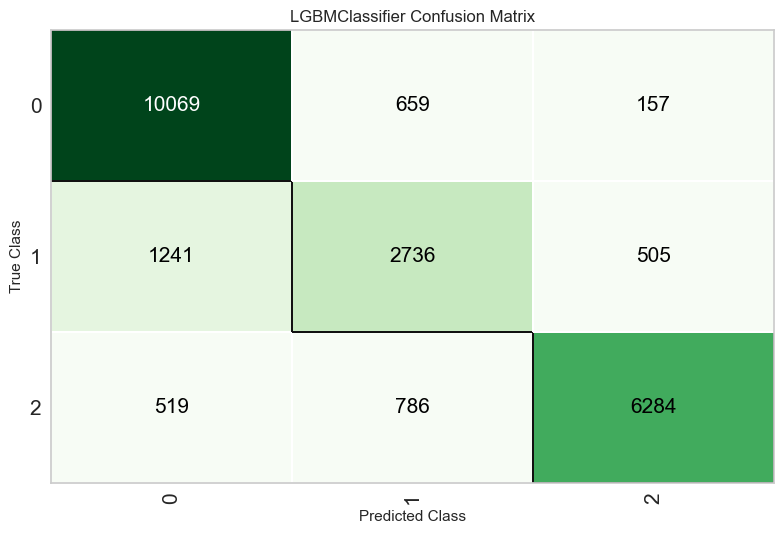

In [294]:
plot_model(tuned_model, plot='confusion_matrix')

In [295]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [296]:
predictions_test = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8315,0.9441,0.8315,0.8305,0.8296,0.7283,0.7300


In [297]:
predictions_train = predict_model(tuned_model, data=exp_clf101.get_config('X_train'))

In [298]:
y_train = get_config('y_train')
y_test = get_config('y_test')

In [299]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Error de entrenamiento
print(accuracy_score(y_train,predictions_train["prediction_label"]))
# Error de test
print(accuracy_score(y_test,predictions_test["prediction_label"]))

0.8673499869310332
0.8315473078933612


## Entrenamiento del modelo completo

In [300]:
%%time
# Finalizar el modelo
final_dt = finalize_model(tuned_model)

CPU times: total: 32 s
Wall time: 8.47 s


## Predicción nuevos datos

In [301]:
# Variables cuantitativas (Activar D1)
D1 = prueba.get(cuantitativas).copy()

# Variables categóricas
D2 = prueba.get(categoricas).copy()
for k in categoricas:
  D2[k] = D2[k].map(nombre_)
D4 = D2.copy()

# Variables al cuadrado (Activar D1)
for k in cuadrado:
  D1[k+"_2"] = D1[k] ** 2

# Interacciones cuantitativas (Activar D1)
for k in result:
  D1[k[0]+"__"+k[1]] = D1[k[0]] * D1[k[1]]

# Razones
for k in result2:
  k2 = k[0]
  D1[k2[0]+"__coc__"+k2[1]] = D1[k2[0]] / (D1[k2[1]]+0.01)

# Interacciones categóricas
for k in result3:
    
  D4[k[0]+"__"+k[1]] = D4[k[0]] + "_" + D4[k[1]]

# Interacción cuantitativa vs categórica
D5 = prueba.copy()
contador = 0
for k in result4:
  col1, col2 = k[1], k[0] # categórica, cuantitativa
  if contador == 0:
    D51 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D51.columns:
      D51[j] = D51[j] * D5[col2]
    D51.columns = [col2+"_"+col1+"_"+ str(x) for x in D51.columns]
  else:
    D52 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D52.columns:
      D52[j] = D52[j] * D5[col2]
    D52.columns = [col2+"_"+col1+"_"+ str(x) for x in D52.columns]
    D51 = pd.concat([D51,D52],axis=1)
  contador = contador + 1

In [302]:
B1 = pd.concat([D1,D4],axis=1)
base_modelo2 = pd.concat([B1,D51],axis=1)
base_modelo2.head(3)

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,Mother's qualification,Father's qualification,Curricular units 1st sem (credited),...,Tuition fees up to date,Gender,Scholarship holder,International,Tuition fees up to date__Scholarship holder,Educational special needs__Tuition fees up to date,Gender__Scholarship holder,Curricular units 2nd sem (approved)_Tuition fees up to date_1,Curricular units 2nd sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Tuition fees up to date_1
0,1,141.0,152.1,18,13.9,-0.3,0.79,3,1,0,...,C0,C0,C0,C0,C0_C0,C0_C0,C0_C0,0,0,0
1,1,128.0,116.5,19,11.1,0.6,2.02,1,19,0,...,C1,C0,C0,C0,C1_C0,C0_C1,C0_C0,6,6,6
2,1,118.0,114.2,18,15.5,2.8,-4.06,1,19,0,...,C1,C0,C1,C0,C1_C1,C0_C1,C0_C1,5,11,6


In [303]:
dataset_test = base_modelo2.copy()
column_types = dataset_test.dtypes
print(column_types)

Previous qualification                                                             int64
Previous qualification (grade)                                                   float64
Admission grade                                                                  float64
Age at enrollment                                                                  int64
Unemployment rate                                                                float64
Inflation rate                                                                   float64
GDP                                                                              float64
Mother's qualification                                                             int64
Father's qualification                                                             int64
Curricular units 1st sem (credited)                                                int64
Curricular units 1st sem (enrolled)                                                int64
Curricular units 1st 

In [304]:
# Realizar predicciones
predictions = predict_model(final_dt, data=dataset_test)

In [305]:
predictions["prediction_label"].value_counts()

prediction_label
0    26349
2    15326
1     9337
Name: count, dtype: int64

In [306]:
predictions["sc"] = predictions.apply(lambda row: 1 if row["prediction_score"]<0.9 else 0, axis = 1)
predictions["sc"].value_counts()

sc
0    25888
1    25124
Name: count, dtype: int64

In [307]:
predictions.head(2)

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,Mother's qualification,Father's qualification,Curricular units 1st sem (credited),...,International,Tuition fees up to date__Scholarship holder,Educational special needs__Tuition fees up to date,Gender__Scholarship holder,Curricular units 2nd sem (approved)_Tuition fees up to date_1,Curricular units 2nd sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Tuition fees up to date_1,prediction_label,prediction_score,sc
0,1,141.0,152.100006,18,13.9,-0.3,0.79,3,1,0,...,C0,C0_C0,C0_C0,C0_C0,0,0,0,2,0.9963,0
1,1,128.0,116.500000,19,11.1,0.6,2.02,1,19,0,...,C0,C1_C0,C0_C1,C0_C0,6,6,6,0,0.9879,0


## Archivo kaggle 1


In [308]:
prueba.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.0,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.5,0,11.1,0.6,2.02


In [309]:
def int(x):
    if x== 0 :
        return "Graduate"
    elif x== 1 :
        return "Enrolled"
    else:
        return "Dropout"

In [310]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': prueba["id"],
    'Target': predictions['sc']
})

result["Target"] = result["Target"].map(int)
result.head(5)

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Enrolled
3,76521,Enrolled
4,76522,Enrolled


In [311]:
# Save the result to a CSV file

result.to_csv(path + '/sample_submission.csv', index=False,sep=",")

In [312]:
# Guardar y cargar modelos
save_model(final_dt, path + 'final_dt_model_customer_churn')

# To load the model later
loaded_model = load_model(path + 'final_dt_model_customer_churn')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


## MODELO 2


In [313]:
%%time
dt1 = create_model('xgboost')  # lightgbm
#dt = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8258,0.9384,0.8258,0.8235,0.8237,0.7195,0.7206
1,0.8283,0.9436,0.8283,0.8279,0.8271,0.7238,0.7250
2,0.8327,0.9449,0.8327,0.8303,0.8306,0.7306,0.7316
3,0.8316,0.9443,0.8316,0.8298,0.8298,0.7289,0.7300
4,0.8402,0.9444,0.8402,0.8396,0.8387,0.7427,0.7441
5,0.8318,0.9442,0.8318,0.8286,0.8292,0.7289,0.7299
6,0.8312,0.9415,0.8312,0.8293,0.8292,0.7282,0.7294
7,0.8292,0.9402,0.8292,0.8263,0.8267,0.7245,0.7257
8,0.8262,0.9429,0.8262,0.8243,0.8241,0.7199,0.7212


CPU times: total: 28.8 s
Wall time: 49 s


In [314]:
from pycaret.classification import *
hyperparameters = dt1.get_params()
hyperparameters

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

In [315]:
import pickle
with open(path + 'modeloI2.pkl', 'wb') as model_file:
    pickle.dump(dt1, model_file)

In [316]:
%%time
# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'min_child_samples': [50,150,200]
}
# Perform Bayesian Search
tuned_model1 = tune_model(dt1, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.9419,0.8267,0.8250,0.8248,0.7209,0.7220
1,0.8346,0.9449,0.8346,0.8330,0.8329,0.7339,0.7349
2,0.8375,0.9452,0.8375,0.8358,0.8355,0.7382,0.7394
3,0.8282,0.9416,0.8282,0.8257,0.8258,0.7230,0.7243
4,0.8287,0.9432,0.8287,0.8277,0.8268,0.7238,0.7254
Mean,0.8311,0.9434,0.8311,0.8294,0.8292,0.7280,0.7292
Std,0.0042,0.0015,0.0042,0.0042,0.0043,0.0068,0.0067


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 59.8 s
Wall time: 4min 10s


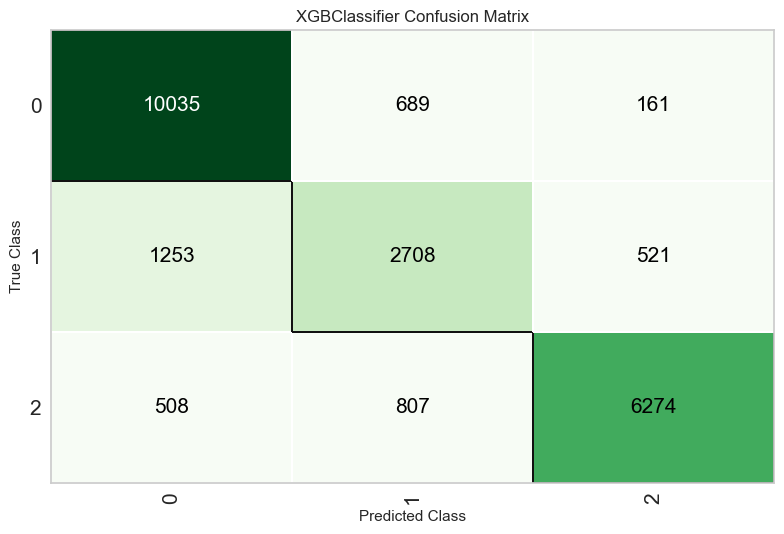

In [317]:
plot_model(tuned_model1, plot='confusion_matrix')

In [318]:
predictions_test = predict_model(tuned_model1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8284,0.9431,0.8284,0.8273,0.8265,0.7234,0.7249


In [319]:
predictions_train = predict_model(tuned_model1, data=exp_clf101.get_config('X_train'))

In [320]:
y_train = get_config('y_train')
y_test = get_config('y_test')

In [321]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Error de entrenamiento
print(accuracy_score(y_train,predictions_train["prediction_label"]))
# Error de test
print(accuracy_score(y_test,predictions_test["prediction_label"]))

0.8685448638960457
0.8284108729743858


In [322]:
%%time
# Finalizar el modelo
final_dt1 = finalize_model(tuned_model1)

CPU times: total: 37 s
Wall time: 9.45 s


In [323]:
# Realizar predicciones
predictions = predict_model(final_dt1, data=dataset_test)

In [324]:
predictions["prediction_label"].value_counts()

prediction_label
0    26371
2    15348
1     9293
Name: count, dtype: int64

In [325]:
predictions["sc"] = predictions.apply(lambda row: 1 if row["prediction_score"]<0.9 else 0, axis = 1)
predictions["sc"].value_counts()

sc
0    25889
1    25123
Name: count, dtype: int64

In [326]:
predictions.head(2)

,Previous qualification,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP,Mother's qualification,Father's qualification,Curricular units 1st sem (credited),...,International,Tuition fees up to date__Scholarship holder,Educational special needs__Tuition fees up to date,Gender__Scholarship holder,Curricular units 2nd sem (approved)_Tuition fees up to date_1,Curricular units 2nd sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Tuition fees up to date_1,prediction_label,prediction_score,sc
0,1,141.0,152.100006,18,13.9,-0.3,0.79,3,1,0,...,C0,C0_C0,C0_C0,C0_C0,0,0,0,2,0.9939,0
1,1,128.0,116.500000,19,11.1,0.6,2.02,1,19,0,...,C0,C1_C0,C0_C1,C0_C0,6,6,6,0,0.9873,0


## ARCHIVO KAGGLE 2

In [327]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': prueba["id"],
    'Target': predictions['sc']
})

result["Target"] = result["Target"].map(int)
result.head(5)

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Enrolled
3,76521,Enrolled
4,76522,Enrolled


In [328]:
# Save the result to a CSV file

result.to_csv(path + '/modelo 2 ing.csv', index=False,sep=",")

In [329]:
# Guardar y cargar modelos
save_model(final_dt1, path + 'final_dt_model_customer_churn')

# To load the model later
loaded_model = load_model(path + 'final_dt_model_customer_churn')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


## MODELO 3

In [330]:
%%time
dt3 = create_model('gbc')  # lightgbm
#dt = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8262,0.0000,0.8262,0.8236,0.8236,0.7196,0.7211
1,0.8247,0.0000,0.8247,0.8241,0.8232,0.7179,0.7192
2,0.8333,0.0000,0.8333,0.8304,0.8307,0.7311,0.7324
3,0.8288,0.0000,0.8288,0.8278,0.8273,0.7246,0.7257
4,0.8307,0.0000,0.8307,0.8301,0.8290,0.7273,0.7288
5,0.8340,0.0000,0.8340,0.8307,0.8312,0.7322,0.7335
6,0.8260,0.0000,0.8260,0.8240,0.8239,0.7196,0.7209
7,0.8247,0.0000,0.8247,0.8220,0.8219,0.7168,0.7184
8,0.8230,0.0000,0.8230,0.8211,0.8208,0.7146,0.7161


CPU times: total: 1min 23s
Wall time: 5min 55s


In [331]:
from pycaret.classification import *
hyperparameters = dt3.get_params()
hyperparameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [332]:
import pickle
with open(path + 'modeloI3.pkl', 'wb') as model_file:
    pickle.dump(dt3, model_file)

In [333]:
%%time
# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}
# Perform Bayesian Search
tuned_model3 = tune_model(dt3, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8260,0.0000,0.8260,0.8251,0.8243,0.7198,0.7211
1,0.8324,0.0000,0.8324,0.8313,0.8308,0.7303,0.7315
2,0.8342,0.0000,0.8342,0.8329,0.8322,0.7328,0.7343
3,0.8273,0.0000,0.8273,0.8255,0.8251,0.7215,0.7230
4,0.8244,0.0000,0.8244,0.8246,0.8228,0.7170,0.7189
Mean,0.8289,0.0000,0.8289,0.8279,0.8271,0.7243,0.7257
Std,0.0038,0.0000,0.0038,0.0035,0.0037,0.0061,0.0060


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 3min 4s
Wall time: 15min 23s


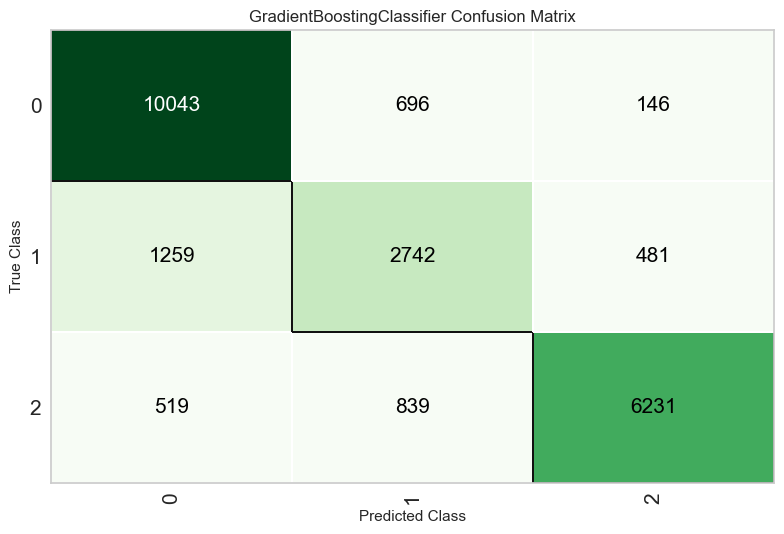

In [334]:
plot_model(tuned_model3, plot='confusion_matrix')

In [335]:
predictions_test = predict_model(tuned_model3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8284,0.9422,0.8284,0.8284,0.8269,0.7235,0.7252


In [336]:
predictions_train = predict_model(tuned_model3, data=exp_clf101.get_config('X_train'))

In [337]:
y_train = get_config('y_train')
y_test = get_config('y_test')

In [338]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Error de entrenamiento
print(accuracy_score(y_train,predictions_train["prediction_label"]))
# Error de test
print(accuracy_score(y_test,predictions_test["prediction_label"]))

0.8329972741869236
0.8283673113782889


In [339]:
%%time
# Finalizar el modelo
final_dt3 = finalize_model(tuned_model3)

CPU times: total: 1min 44s
Wall time: 2min 49s


In [340]:
# Realizar predicciones
predictions = predict_model(final_dt3, data=dataset_test)

In [341]:
predictions["prediction_label"].value_counts()

prediction_label
0    26462
2    15146
1     9404
Name: count, dtype: int64

In [342]:
predictions["sc"] = predictions.apply(lambda row: 1 if row["prediction_score"]<0.9 else 0, axis = 1)
predictions["sc"].value_counts()

sc
1    26042
0    24970
Name: count, dtype: int64

## Archivo kaggle 3


In [343]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': prueba["id"],
    'Target': predictions['sc']
})

result["Target"] = result["Target"].map(int)
result.head(5)

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Enrolled
3,76521,Enrolled
4,76522,Enrolled


In [344]:
# Save the result to a CSV file

result.to_csv(path + '/modelo 3 ing.csv', index=False,sep=",")

In [345]:
# Guardar y cargar modelos
save_model(final_dt3, path + 'final_dt_model_customer_churn')

# To load the model later
loaded_model = load_model(path + 'final_dt_model_customer_churn')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [346]:
pre1 = pd.read_csv(path  + 'sample_submission.csv')
pre3 = pd.read_csv(path + "modelo 3 ing.csv")

In [347]:
comparacion = pre1["Target"] == pre3["Target"]
comparacion.sum()

47280

In [348]:
pre1 = pd.read_csv(path  + 'sample_submission.csv')
pre2 = pd.read_csv(path + "modelo 2 ing.csv")

In [349]:
comparacion = pre1["Target"] == pre2["Target"]
comparacion.sum()

48697

In [350]:
pre2 = pd.read_csv(path + "modelo 2 ing.csv")
pre3 = pd.read_csv(path  + 'modelo 3 ing.csv')

In [351]:
comparacion = pre2["Target"] == pre3["Target"]
comparacion.sum()

47285